In [138]:
import pandas as pd
df = pd.read_csv('dane_wiki_final.csv')
df.info()
# errors in this row - looks like sentence is cut to one word only, list has length 1
df = df.drop(index=1528)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439 entries, 0 to 2438
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            2439 non-null   int64 
 1   term                  2439 non-null   object
 2   response_gpt3         2439 non-null   object
 3   pos_gpt3              2439 non-null   object
 4   response_gpt4         2439 non-null   object
 5   pos_gpt4              2439 non-null   object
 6   wiki_response_gpt3    2439 non-null   object
 7   wiki_pos_gpt3         2439 non-null   object
 8   wiki_response_gpt4    2439 non-null   object
 9   wiki_pos_gpt4         2439 non-null   object
 10  response_orca         2439 non-null   object
 11  pos_orca              2439 non-null   object
 12  wiki_response_orca    2439 non-null   object
 13  wiki_pos_orca         2439 non-null   object
 14  prompt                2439 non-null   object
 15  response_falcon       2439 non-null   

In [139]:
#text_columns = ["response_gpt3",  "wiki_response_gpt3", "response_gpt4", "wiki_response_gpt4", "response_orca", "wiki_response_orca",
#               "response_falcon", "wiki_response_falcon", "response_llama", "wiki_response_llama", "response_llama3", 
#               "wiki_response_llama3", "wiki_text_y", "sumy", "bart_sum", "text", "wiki_text", "ts_sum", "gensim_sum"]
text_columns = ["response_gpt3",  "wiki_response_gpt3", "response_gpt4", "wiki_response_gpt4", "response_orca", "wiki_response_orca",
               "response_falcon", "wiki_response_falcon", "response_llama", "wiki_response_llama", "response_llama3", 
               "wiki_response_llama3", "wiki_text_y", "bart_sum", "gensim_sum"]

text_columns_renamed = {
    'response_gpt3': 'GPT3', 
    'wiki_response_gpt3': 'wiki_GPT3',
    'response_gpt4':'GPT4',
    'wiki_response_gpt4': 'wiki_GPT4',
    'response_orca':'Orca', 
    'wiki_response_orca': 'wiki_Orca', 
    'response_falcon': 'Falcon',
    'wiki_response_falcon': 'wiki_Falcon', 
    'response_llama':'Llama',
    'wiki_response_llama':'wiki_Llama', 
    'response_llama3':'Llama3',
    'wiki_response_llama3':'wiki_Llama3',
    'wiki_text_y': 'Wikipedia', 
    'bart_sum': 'Bart', 
    'gensim_sum' : 'Gensim'}

df_text = df[text_columns]

df_text = df_text.rename(columns=text_columns_renamed)

In [140]:
import os

# save sample of data to be used in thesis
sample_text = 'sample_text.csv'
sample_df_text = df_text.iloc[0:1].to_csv(sample_text, index=False)

MAL

In [141]:
from helpers.TextManipulations import split_text_into_sentences
from helpers.TextManipulations import perform_text_preprocessing
from algorithms.MAL.MAL import create_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import perform_word_split
from algorithms.MAL.MAL import create_words_length_in_sentence_dict
from algorithms.MAL.MAL import count_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict_single
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import print_sorted
from algorithms.MAL.MAL import perform_syllable_split
from algorithms.MAL.MAL import create_words_length_in_sentence_dict
from algorithms.MAL.MAL import count_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict_single
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import perform_phoneme_split
from algorithms.MAL.MAL import count_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict_single
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import find_A_b_numerically_truncated
from algorithms.MAL.MAL import find_A_b_numerically_full



def perform_mal(paragraphs)-> float:
    #print("Paragraphs")
    #print(paragraphs)
    sentences = [split_text_into_sentences(element) for element in paragraphs]
    #print("Sentences")
    #print(sentences)
    sentences_normalized = [[perform_text_preprocessing(string) for string in inner_list] for inner_list in sentences]
    #print("Sentences Normalized")
    #print(sentences_normalized)
    sentences_dict = create_sentences_length_in_paragraph_dict(sentences_normalized)
    #print("Sentences Dict")
    #print(sentences_dict)
    sentences_dict_split = perform_word_split(sentences_dict)
    #print("sentences_dict_split")
    #print(sentences_dict_split)
    words_dict = create_words_length_in_sentence_dict(sentences_dict_split)
    words_dict.pop(0, None) # remove sentence of length zero if encountered
    #print("words_dict")
    #print(words_dict)
    sentences_dict_split_counted = count_sentences_length_in_paragraph_dict(sentences_dict_split) 
    #print("sentences_dict_split_counted")
    #print(sentences_dict_split_counted)
    sentences_dict_split_counted_average_single = average_sentences_length_in_paragraph_dict_single(sentences_dict_split_counted) 

    # Level 1: Paragraph - Sentence - Word (X_1, Y_1)
    X_1_Y_1 = average_sentences_length_in_paragraph_dict(sentences_dict_split_counted_average_single) 
    # print_sorted(X_1_Y_1)
    # Level 2: Sentence - Word - Syllable (X_2, Y_2)
    words_dict_split = perform_syllable_split(words_dict)
    syllables_dict = create_words_length_in_sentence_dict(words_dict_split) 
    words_dict_split_counted = count_sentences_length_in_paragraph_dict(words_dict_split) 
    words_dict_split_counted_average_single = average_sentences_length_in_paragraph_dict_single(words_dict_split_counted) 
    X_2_Y_2 = average_sentences_length_in_paragraph_dict(words_dict_split_counted_average_single) 
    # print_sorted(X_2_Y_2)
    syllables_dict_split = perform_phoneme_split(syllables_dict)
    syllables_dict_split_counted = count_sentences_length_in_paragraph_dict(syllables_dict_split) 

    # Level 3: Word - Syllable - Phoneme (X_3, Y_3)
    syllables_dict_split_counted_average_single = average_sentences_length_in_paragraph_dict_single(syllables_dict_split_counted) 
    X_3_Y_3 = average_sentences_length_in_paragraph_dict(syllables_dict_split_counted_average_single) 
    #print_sorted(X_3_Y_3)

    a_1, b_1 = find_A_b_numerically_truncated(X_1_Y_1)
    #print(b_1)
    a_2, b_2 = find_A_b_numerically_truncated(X_2_Y_2)
    #print(b_2)
    a_3, b_3 = find_A_b_numerically_truncated(X_3_Y_3)
    #print(b_3)

    D_trun = 3 / (b_1 + b_2 + b_3)

    a_1, b_1, c_1 = find_A_b_numerically_full(X_1_Y_1)
    #print(b_1)
    a_2, b_2, c_2 = find_A_b_numerically_full(X_2_Y_2)
    #print(b_2)
    a_3, b_3, c_3 = find_A_b_numerically_full(X_3_Y_3)
    #print(b_3)

    D_full = 3 / (b_1 + b_2 + b_3)
    return D_trun, D_full

Paragraph - Sentence - Word - Syllable - Phoneme

In [142]:
def clean_and_convert_to_list(series):
    nonan_series = series.dropna()
    result = nonan_series.astype(str).values.flatten().tolist()
    return result

In [143]:
D_trun_s, D_full_s = zip(*[perform_mal(clean_and_convert_to_list(df[column])) for column in text_columns])
print(D_trun_s)
print(D_full_s)

/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in exp
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in multiply
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in exp
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in multiply
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in exp
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena

(7.635130099755828, 6.762130462576433, 4.906105945598152, 4.252187298906017, 5.634261450173764, 7.7732902189700965, 6.040038749349263, 4.526408022184367, 5.693638756296708, 5.2669014946495505, 7.801850542623138, 7.62600040859855, 3.8672955752764415, 3.1461641262759246, 10.265167231018722)
(1.7319335798118896, 3.4059144655700857, -27.56221031055833, -332.0938631665155, 10.23322566539091, -10.07089487454804, -9.471826509997278, -65.71363220516754, -19.980794456008542, -3.160791375165371, 24.842133678298136, 7.375975143348243, 3.185641077497482, 2.955990858973552, 6.649823206955635)


/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in exp
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in multiply
  return a * pow(x, -b) * np.exp(-c * x)


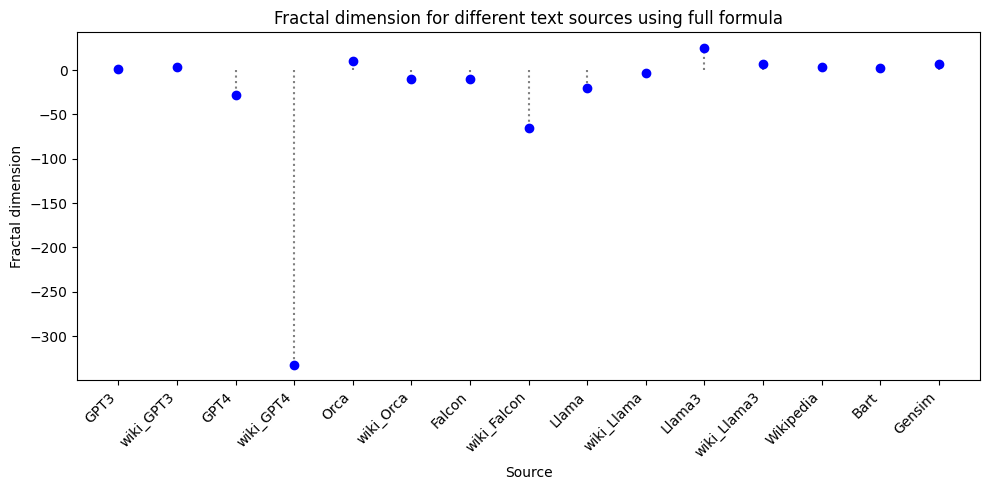

In [144]:
import matplotlib.pyplot as plt

def plot_scatter(D_s, text_coulmns, title, algorithm):
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(D_s)), D_s, color='blue', zorder=5)

    plt.xticks(range(len(text_coulmns)), [text_columns_renamed.get(key, key) for key in text_coulmns], rotation=45, ha="right")

    plt.xlabel('Source')
    plt.ylabel('Fractal dimension')
    plt.title(title)
    
    for i, label in enumerate(text_coulmns):
        plt.vlines(i, ymin=0, ymax=D_s[i], colors='gray', linestyles='dotted')

    plt.tight_layout()
    plt.savefig(f'dane_wiki_final_{algorithm}.png')
    plt.show()

#plot_scatter(D_trun_s, text_columns, 'Fractal dimension for different text sources using truncated formula', 'MAL')
plot_scatter(D_full_s, text_columns, 'Fractal dimension for different text sources using full formula', 'MAL')

Partition Data

In [145]:
def apply_MAL_in_partitions(df, text_columns, partition_length, perform_mal):
    results = {}
    for column in text_columns:
        column_nonan = df[column].fillna('')
        col_values = clean_and_convert_to_list(df[column])      

        partitions = [col_values[i:i + partition_length] for i in range(0, len(col_values), partition_length)]

        for idx, partition in enumerate(partitions):
            results[(column, idx)] = perform_mal(partition)
    return results

In [146]:
partition_length = 700
D_s = apply_MAL_in_partitions(df, text_columns, partition_length, perform_mal)
print(D_s)

/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in exp
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in multiply
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in exp
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in multiply
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in exp
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena

{('response_gpt3', 0): (10.458671030445439, 1.8672612101100243), ('response_gpt3', 1): (6.3741503140823195, 2.1432091239711197), ('response_gpt3', 2): (6.137865044340046, 2.8810413037204747), ('response_gpt3', 3): (3.77551282188242, -22.267904905313856), ('wiki_response_gpt3', 0): (5.523738370629349, 3.2045231516222583), ('wiki_response_gpt3', 1): (6.993735252134893, -33.39777522257409), ('wiki_response_gpt3', 2): (5.94476245527527, 5.290369778933084), ('wiki_response_gpt3', 3): (8.307616595696803, 2.095881802901677), ('response_gpt4', 0): (3.1394588133517067, -1.186736289687208), ('response_gpt4', 1): (4.8905549665546575, 15.852574641147543), ('response_gpt4', 2): (5.623819263685039, -6.848364514536986), ('response_gpt4', 3): (3.761463350727698, 11.30481896307548), ('wiki_response_gpt4', 0): (3.73949260806755, 27.777667807405926), ('wiki_response_gpt4', 1): (3.761916488886501, -3.018559777785589), ('wiki_response_gpt4', 2): (4.5395610265262665, -51.01137063755485), ('wiki_response_gpt

In [147]:
import matplotlib.pyplot as plt

def bar_plot(results):
    plt.figure(figsize=(12, 6))
    labels = [f"{col}_part{i}" for col, i in results.keys()]
    values = list(results.values())

    plt.bar(range(len(results)), values, color='blue', alpha=0.7)
    plt.xlabel('Partition')
    plt.ylabel('Result from MAL')
    plt.title('Results of MAL Applied to Partitions of Columns')
    plt.xticks(range(len(results)), labels, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [148]:
#bar_plot(D_s)

Data with pos to list transformation

In [149]:
#pos_columns = ["pos_gpt3", "wiki_pos_gpt3", "pos_gpt4", "wiki_pos_gpt4", "pos_orca", "wiki_pos_orca", "pos_falcon",
#               "wiki_pos_falcon", "pos_llama", "wiki_pos_llama", "pos_llama3", "wiki_pos_llama3", "text_pos", "sumy_pos",
#              "bart_pos", "ts_pos", "gensim_pos"]

pos_columns = ["pos_gpt3", "wiki_pos_gpt3", "pos_gpt4", "wiki_pos_gpt4", "pos_orca", "wiki_pos_orca", "pos_falcon",
               "wiki_pos_falcon", "pos_llama", "wiki_pos_llama", "pos_llama3", "wiki_pos_llama3", "text_pos",
              "bart_pos", "gensim_pos"]

dict_pos_to_response = {
    "pos_gpt3": "response_gpt3",
    "wiki_pos_gpt3": "wiki_response_gpt3",
    "pos_gpt4":"response_gpt4",
    "wiki_pos_gpt4":"wiki_response_gpt4",
    "pos_orca":"response_orca",
    "wiki_pos_orca":"wiki_response_orca",
    "pos_falcon":"response_falcon",
    "wiki_pos_falcon":"wiki_response_falcon",
    "pos_llama":"response_llama",
    "wiki_pos_llama":"wiki_response_llama",
    "pos_llama3":"response_llama3",
    "wiki_pos_llama3":"wiki_response_llama3",
    "text_pos":"text",
    "bart_pos":"bart_sum",
    "gensim_pos":"gensim_sum"
}

pos_df = df[pos_columns]
pos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pos_gpt3         2438 non-null   object
 1   wiki_pos_gpt3    2438 non-null   object
 2   pos_gpt4         2438 non-null   object
 3   wiki_pos_gpt4    2438 non-null   object
 4   pos_orca         2438 non-null   object
 5   wiki_pos_orca    2438 non-null   object
 6   pos_falcon       2438 non-null   object
 7   wiki_pos_falcon  2438 non-null   object
 8   pos_llama        2438 non-null   object
 9   wiki_pos_llama   2438 non-null   object
 10  pos_llama3       2438 non-null   object
 11  wiki_pos_llama3  2438 non-null   object
 12  text_pos         2438 non-null   object
 13  bart_pos         2438 non-null   object
 14  gensim_pos       2438 non-null   object
dtypes: object(15)
memory usage: 304.8+ KB


In [150]:
import ast

# util function to convert list in a cell to python list
def convert_to_list(cell):
    try:
        return ast.literal_eval(cell)
    except (ValueError, SyntaxError):
        return cell

pos_df_list = pos_df.applymap(convert_to_list) 
pos_df_list.info()
pos_df_list.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pos_gpt3         2438 non-null   object
 1   wiki_pos_gpt3    2438 non-null   object
 2   pos_gpt4         2438 non-null   object
 3   wiki_pos_gpt4    2438 non-null   object
 4   pos_orca         2438 non-null   object
 5   wiki_pos_orca    2438 non-null   object
 6   pos_falcon       2438 non-null   object
 7   wiki_pos_falcon  2438 non-null   object
 8   pos_llama        2438 non-null   object
 9   wiki_pos_llama   2438 non-null   object
 10  pos_llama3       2438 non-null   object
 11  wiki_pos_llama3  2438 non-null   object
 12  text_pos         2438 non-null   object
 13  bart_pos         2438 non-null   object
 14  gensim_pos       2438 non-null   object
dtypes: object(15)
memory usage: 304.8+ KB


,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,bart_pos,gensim_pos
0,"[7, 9, 13, 17, 12, 9, 2, 13, 14, 17, 14, 9, 14...","[7, 13, 4, 7, 9, 2, 13, 12, 17, 2, 7, 1, 6, 1,...","[13, 4, 7, 1, 9, 12, 17, 11, 14, 17, 14, 14, 1...","[13, 14, 3, 17, 9, 14, 4, 7, 1, 9, 12, 17, 11,...","[13, 4, 7, 1, 9, 12, 17, 2, 7, 9, 6, 7, 9, 14,...","[13, 4, 7, 1, 9, 12, 17, 14, 9, 14, 6, 14, 1, ...","[13, 4, 7, 1, 9, 12, 17, 14, 9, 14, 6, 14, 9, ...","[13, 4, 7, 1, 9, 12, 17, 14, 9, 14, 6, 14, 9, ...","[20, 7, 9, 4, 7, 1, 9, 12, 17, 14, 9, 14, 6, 1...","[20, 7, 9, 4, 7, 1, 9, 12, 17, 14, 9, 14, 6, 1...","[7, 9, 14, 13, 14, 17, 2, 7, 9, 6, 9, 2, 7, 9,...","[7, 9, 14, 13, 14, 17, 2, 7, 9, 6, 9, 2, 7, 1,...","[13, 6, 13, 14, 13, 13, 4, 7, 9, 6, 9, 12, 17,...","[13, 6, 13, 14, 13, 13, 4, 7, 9, 6, 9, 12, 17,...","[7, 1, 1, 9, 17, 13, 14, 2, 7, 13, 14, 10, 16,..."
1,"[13, 4, 7, 9, 17, 2, 7, 9, 2, 13, 13, 14, 13, ...","[13, 4, 7, 9, 17, 2, 7, 9, 2, 13, 13, 14, 13, ...","[13, 4, 7, 9, 2, 7, 13, 13, 9, 2, 13, 14, 17, ...","[13, 4, 7, 9, 6, 9, 17, 2, 7, 1, 9, 2, 13, 13,...","[13, 4, 7, 9, 17, 2, 7, 9, 2, 13, 13, 14, 13, ...","[13, 4, 7, 9, 6, 9, 17, 2, 7, 9, 2, 13, 13, 14...","[13, 4, 7, 9, 17, 2, 7, 1, 9, 2, 13, 14, 3, 2,...","[13, 4, 7, 9, 17, 2, 7, 9, 2, 13, 13, 14, 13, ...","[20, 13, 4, 7, 9, 17, 2, 1, 13, 14, 2, 7, 9, 2...","[20, 13, 4, 7, 9, 17, 2, 1, 13, 14, 2, 7, 9, 2...","[13, 4, 7, 9, 2, 1, 13, 9, 12, 4, 17, 11, 17, ...","[13, 4, 7, 9, 17, 2, 7, 9, 2, 13, 13, 14, 13, ...","[13, 4, 7, 9, 6, 12, 17, 9, 12, 4, 9, 2, 13, 1...","[13, 4, 7, 9, 6, 12, 17, 9, 12, 4, 9, 2, 13, 1...","[13, 4, 7, 9, 6, 12, 17, 9, 12, 4, 9, 2, 13, 1..."
2,"[3, 14, 14, 13, 14, 4, 3, 7, 17, 9, 14, 3, 17,...","[13, 4, 7, 1, 9, 17, 9, 12, 4, 17, 9, 2, 7, 9,...","[13, 4, 7, 1, 9, 12, 17, 1, 9, 14, 2, 1, 9, 14...","[13, 4, 7, 9, 2, 1, 9, 12, 4, 3, 17, 2, 1, 9, ...","[13, 4, 7, 13, 9, 14, 9, 14, 6, 9, 9, 12, 17, ...","[13, 4, 7, 13, 9, 6, 9, 12, 17, 2, 9, 2, 17, 7...","[13, 4, 7, 1, 9, 17, 11, 17, 2, 7, 9, 2, 9, 12...","[13, 4, 7, 13, 14, 1, 9, 14, 9, 14, 6, 9, 9, 1...","[20, 13, 4, 7, 1, 1, 9, 14, 9, 6, 9, 12, 17, 2...","[20, 13, 4, 7, 1, 1, 9, 6, 9, 12, 17, 2, 9, 2,...","[3, 4, 7, 9, 2, 7, 9, 14, 13, 14, 2, 1, 9, 14,...","[13, 4, 7, 13, 9, 12, 17, 2, 7, 9, 2, 9, 6, 9,...","[13, 4, 7, 1, 9, 9, 2, 13, 9, 6, 9, 13, 13, 17...","[13, 4, 7, 1, 9, 9, 2, 13, 9, 6, 9, 13, 13, 17...","[10, 2, 7, 9, 2, 7, 9, 4, 3, 17, 2, 9, 2, 1, 9..."
3,"[13, 4, 7, 1, 9, 12, 17, 2, 7, 13, 13, 9, 2, 7...","[7, 13, 4, 7, 1, 9, 12, 17, 7, 9, 17, 9, 2, 7,...","[13, 4, 7, 1, 9, 17, 2, 10, 2, 7, 1, 9, 12, 17...","[7, 13, 4, 7, 1, 1, 9, 12, 17, 2, 7, 1, 9, 14,...","[13, 4, 7, 1, 1, 9, 2, 9, 17, 11, 17, 9, 6, 9,...","[13, 4, 7, 1, 1, 9, 2, 9, 17, 11, 17, 9, 6, 9,...","[13, 4, 7, 9, 17, 11, 17, 7, 9, 2, 9, 12, 4, 2...","[13, 4, 7, 9, 17, 11, 17, 7, 9, 2, 9, 12, 17, ...","[20, 7, 9, 14, 13, 14, 4, 17, 2, 7, 1, 9, 14, ...","[20, 7, 13, 4, 7, 1, 13, 14, 1, 9, 12, 17, 7, ...","[13, 4, 7, 1, 1, 9, 12, 17, 2, 7, 9, 2, 17, 6,...","[13, 4, 7, 1, 1, 9, 12, 17, 2, 7, 9, 2, 1, 14,...","[7, 13, 14, 3, 17, 13, 14, 4, 7, 1, 9, 2, 7, 1...","[7, 13, 4, 7, 1, 9, 2, 7, 13, 14, 12, 17, 3, 3...","[17, 2, 13, 13, 14, 2, 10, 9, 14, 7, 9, 13, 17..."
4,"[7, 9, 14, 13, 14, 17, 2, 7, 1, 9, 6, 9, 12, 4...","[13, 4, 7, 1, 9, 3, 17, 2, 1, 9, 6, 9, 11, 17,...","[12, 4, 1, 2, 7, 9, 6, 12, 17, 12, 4, 4, 7, 9,...","[7, 9, 14, 13, 14, 17, 2, 7, 9, 2, 9, 14, 3, 2...","[13, 4, 7, 1, 9, 12, 17, 2, 7, 9, 15, 12, 4, 1...","[13, 4, 7, 1, 6, 1, 9, 12, 4, 4, 17, 2, 1, 9, ...","[13, 4, 7, 9, 17, 11, 17, 7, 9, 2, 9, 12, 4, 1...","[13, 4, 7, 9, 2, 17, 9, 2, 7, 9, 13, 14, 12, 4...","[20, 13, 4, 7, 1, 9, 12, 17, 7, 9, 6, 17, 9, 2...","[20, 13, 4, 7, 9, 2, 9, 17, 2, 7, 9, 13, 14, 1...","[3, 4, 7, 9, 2, 13, 2, 10, 9, 14, 20, 13, 17, ...","[13, 4, 7, 9, 2, 9, 2, 7, 9, 13, 14, 3, 17, 2,...","[13, 4, 7, 9, 2, 9, 2, 7, 9, 13, 14, 17, 7, 1,...","[13, 4, 7, 9, 2

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

def box_plot(df, algorithm):
    plt.figure(figsize=(17, 12))
    df.boxplot()
    plt.title(f'Hurst exponent for different text sources calculated using {algorithm}')
    plt.xlabel('Source')
    plt.ylabel('Hurst exponent')
    plt.xticks(rotation=45)  # Rotate column labels if needed
    plt.savefig(f'Box_plot_{algorithm}.png')
    plt.show()

Utility functions

In [152]:
import numpy as np

def find_outliers(df, bound_limit):
    outliers_dict = {}
    median_dict = {}
    for col in df.columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - bound_limit * IQR
        upper_bound = Q3 + bound_limit * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outliers_dict[col] = outliers
    return outliers_dict

In [153]:
def print_outliers(df, outliers):
    for col, outlier_indices in outliers.items():
        print(f"Column {col} outlier indices: {outlier_indices}")
        print(f"Column {col} outlier values pos: {df[col][outlier_indices].tolist()}")
        print(f"Column {col} outlier values text: {df[dict_pos_to_response.get(col)][outlier_indices].tolist()}")

DFA (each cell separately)

In [154]:
from helpers.TimeSeries import construct_its
from algorithms.DFA.DFA import perform_dfa

def dfa_calculate_cell_pos(cell, ranges):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    its = construct_its(cell)
    estimated_h = perform_dfa(its, ranges)
    return estimated_h

In [155]:
from helpers.TimeSeries import construct_its
from algorithms.DFA.DFA import perform_dfa
from helpers.TextManipulations import perform_text_preprocessing
from helpers.TextManipulations import tokenize_text
from helpers.TimeSeries import construct_fts_from_tokens



def dfa_calculate_cell_fts(cell, ranges):
    #print(cell)
    text_cleaned = perform_text_preprocessing(cell)
    token_words = tokenize_text(text_cleaned)
    fts = construct_fts_from_tokens(token_words)
    its = construct_its(fts)
    estimated_h = perform_dfa(its, ranges)
    return estimated_h

In [156]:
from helpers.TimeSeries import construct_its
from algorithms.DFA.DFA import perform_dfa
from helpers.TextManipulations import perform_text_preprocessing
from helpers.TextManipulations import tokenize_text
from helpers.TimeSeries import construct_lts_from_tokens



def dfa_calculate_cell_lts(cell, ranges):
    #print(cell)
    text_cleaned = perform_text_preprocessing(cell)
    token_words = tokenize_text(text_cleaned)
    lts = construct_lts_from_tokens(token_words)
    its = construct_its(lts)
    estimated_h = perform_dfa(its, ranges)
    return estimated_h

In [157]:
import os

h_df_filename_dfa = 'h_df_dfa_pos.csv'

def load_or_create_h_df_filename_dfa_pos(pos_df_list):
    if os.path.exists(h_df_filename_dfa):
        h_df = pd.read_csv(h_df_filename_dfa)
    else:
        h_df = pos_df_list.applymap(lambda x: dfa_calculate_cell_pos(x, [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]))   
        h_df.to_csv(h_df_filename_dfa, index=False)
        print("DataFrame created and saved to file.")
    return h_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         2438 non-null   float64
 1   wiki_pos_gpt3    2438 non-null   float64
 2   pos_gpt4         2438 non-null   float64
 3   wiki_pos_gpt4    2438 non-null   float64
 4   pos_orca         2438 non-null   float64
 5   wiki_pos_orca    2438 non-null   float64
 6   pos_falcon       2438 non-null   float64
 7   wiki_pos_falcon  2438 non-null   float64
 8   pos_llama        2438 non-null   float64
 9   wiki_pos_llama   2438 non-null   float64
 10  pos_llama3       2438 non-null   float64
 11  wiki_pos_llama3  2438 non-null   float64
 12  text_pos         2438 non-null   float64
 13  bart_pos         2438 non-null   float64
 14  gensim_pos       2418 non-null   float64
dtypes: float64(15)
memory usage: 285.8 KB


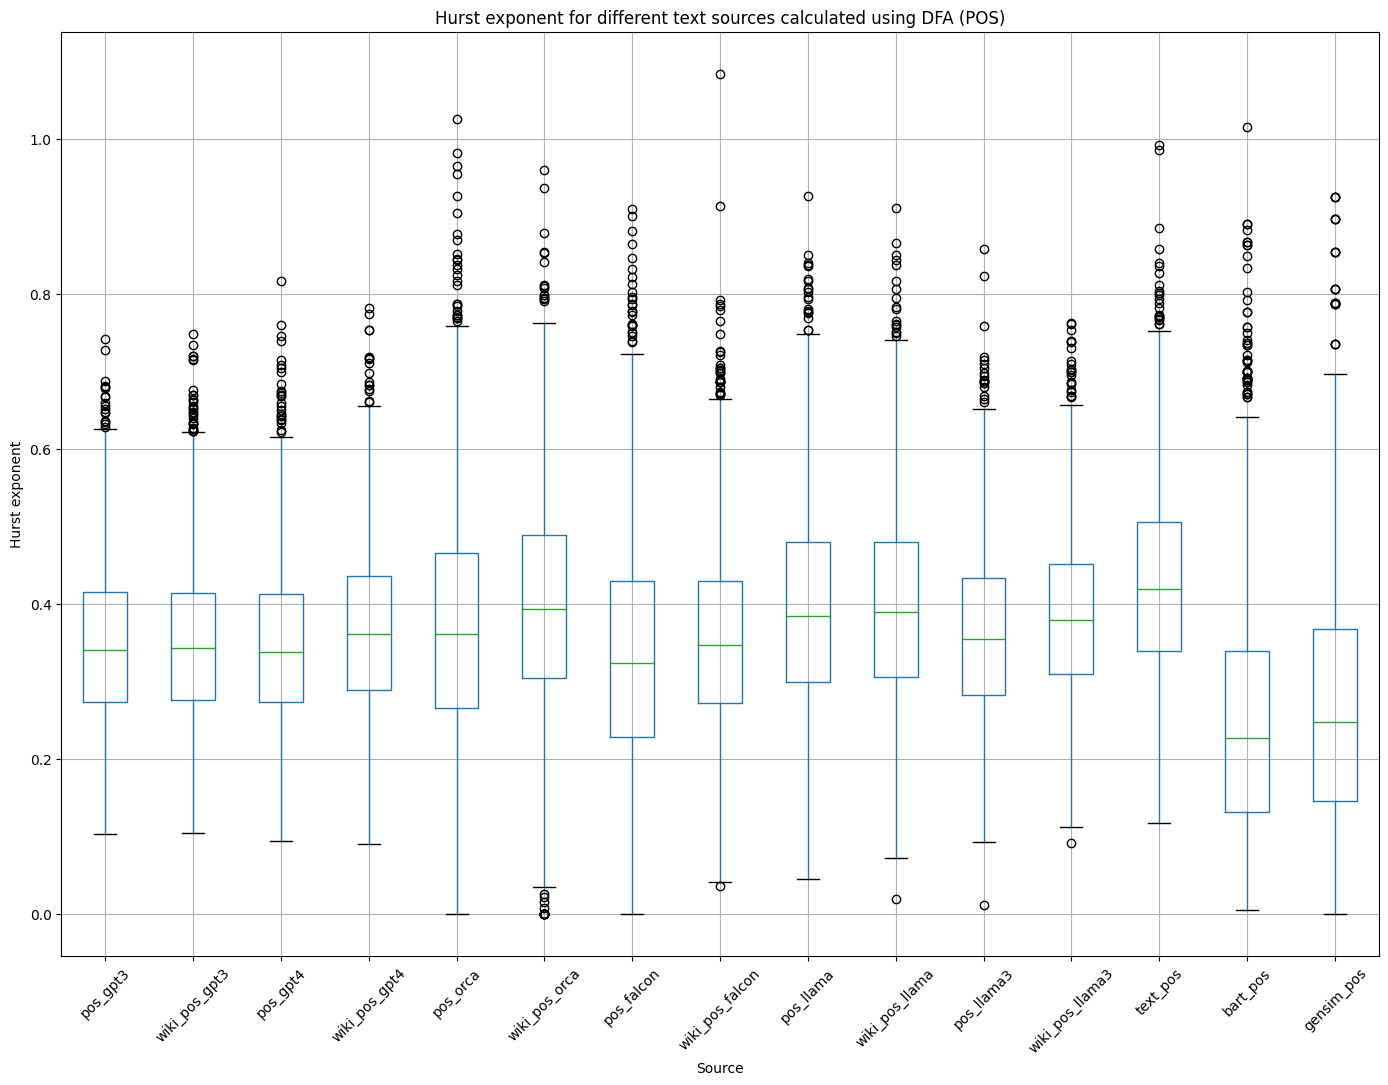

In [158]:
h_df_dfa_pos = load_or_create_h_df_filename_dfa_pos(pos_df_list)
h_df_dfa_pos.info()
h_df_dfa_pos.head()
box_plot(h_df_dfa_pos, 'DFA (POS)')

In [159]:
import os
import pandas as pd

h_df_filename_dfa = 'h_df_dfa_fts.csv'

def load_or_create_h_df_filename_dfa_fts(df_text):
    if os.path.exists(h_df_filename_dfa):
        h_df = pd.read_csv(h_df_filename_dfa)
    else:
        h_df = df_text.applymap(lambda x: dfa_calculate_cell_fts(x, [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]) if pd.notnull(x) else x)   
        h_df.to_csv(h_df_filename_dfa, index=False)
        print("DataFrame created and saved to file.")
    return h_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         2438 non-null   float64
 1   wiki_GPT3    2438 non-null   float64
 2   GPT4         2438 non-null   float64
 3   wiki_GPT4    2438 non-null   float64
 4   Orca         2435 non-null   float64
 5   wiki_Orca    2429 non-null   float64
 6   Falcon       2432 non-null   float64
 7   wiki_Falcon  2438 non-null   float64
 8   Llama        2438 non-null   float64
 9   wiki_Llama   2437 non-null   float64
 10  Llama3       2437 non-null   float64
 11  wiki_Llama3  2438 non-null   float64
 12  Wikipedia    940 non-null    float64
 13  Bart         2437 non-null   float64
 14  Gensim       2387 non-null   float64
dtypes: float64(15)
memory usage: 285.8 KB


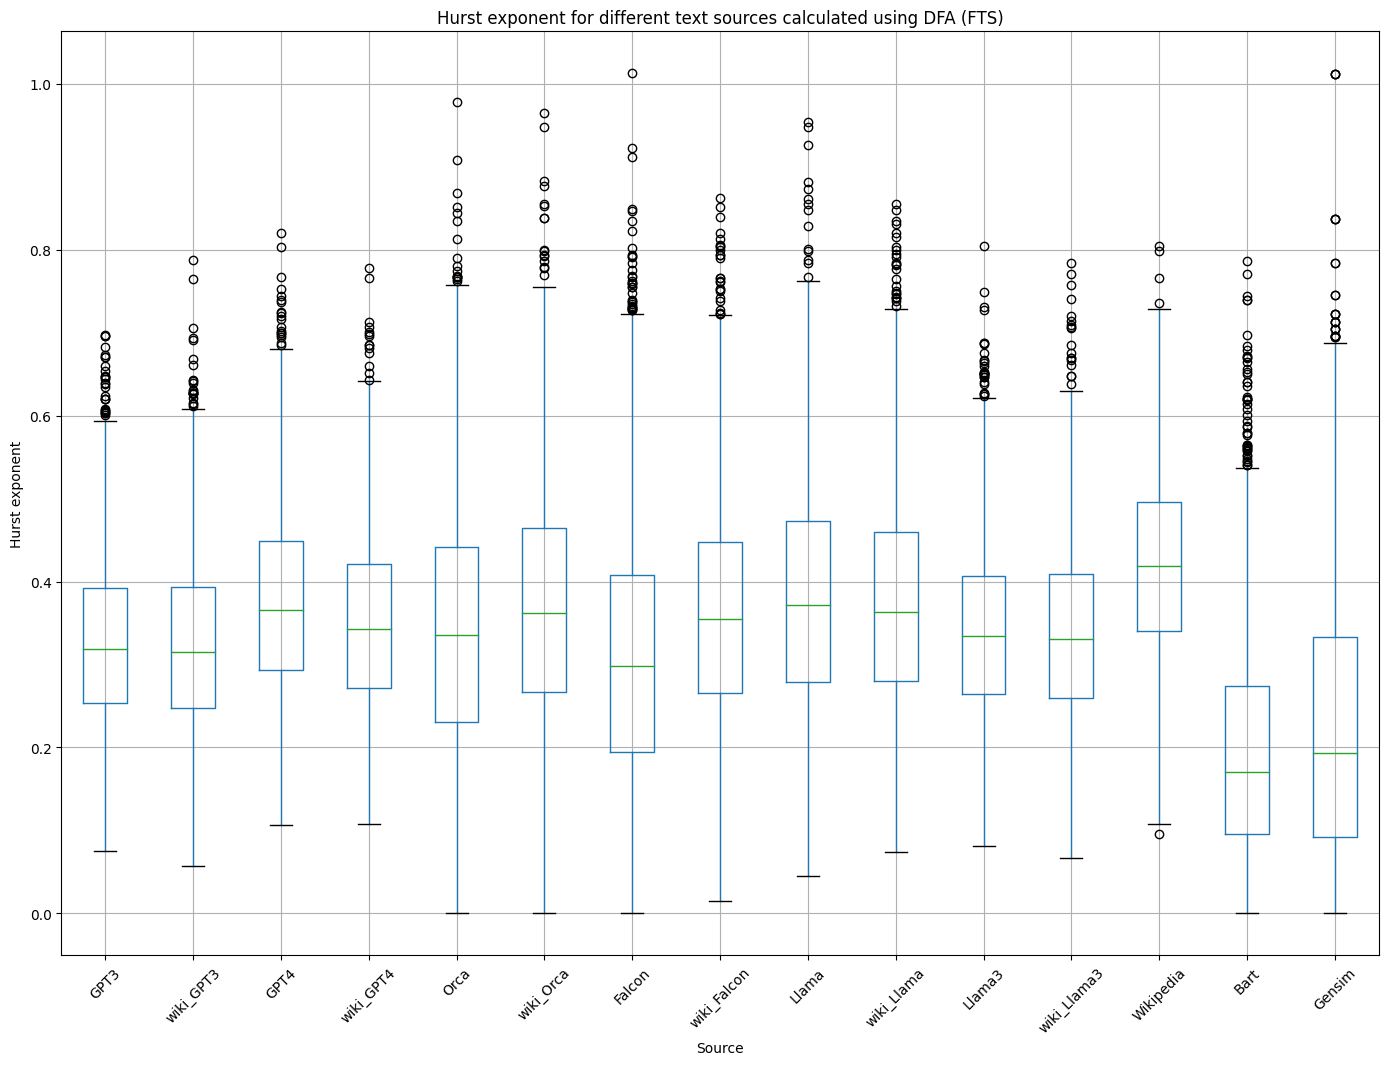

In [160]:
h_df_dfa_fts = load_or_create_h_df_filename_dfa_fts(df_text)
h_df_dfa_fts.info()
h_df_dfa_fts.head()
box_plot(h_df_dfa_fts, 'DFA (FTS)')

In [161]:
import os
import pandas as pd

h_df_filename_dfa = 'h_df_dfa_lts.csv'

def load_or_create_h_df_filename_dfa_lts(df_text):
    if os.path.exists(h_df_filename_dfa):
        h_df = pd.read_csv(h_df_filename_dfa)
    else:
        h_df = df_text.applymap(lambda x: dfa_calculate_cell_lts(x, [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]) if pd.notnull(x) else x)   
        h_df.to_csv(h_df_filename_dfa, index=False)
        print("DataFrame created and saved to file.")
    return h_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         2438 non-null   float64
 1   wiki_GPT3    2438 non-null   float64
 2   GPT4         2438 non-null   float64
 3   wiki_GPT4    2438 non-null   float64
 4   Orca         2438 non-null   float64
 5   wiki_Orca    2437 non-null   float64
 6   Falcon       2438 non-null   float64
 7   wiki_Falcon  2438 non-null   float64
 8   Llama        2438 non-null   float64
 9   wiki_Llama   2438 non-null   float64
 10  Llama3       2438 non-null   float64
 11  wiki_Llama3  2438 non-null   float64
 12  Wikipedia    940 non-null    float64
 13  Bart         2438 non-null   float64
 14  Gensim       2418 non-null   float64
dtypes: float64(15)
memory usage: 285.8 KB


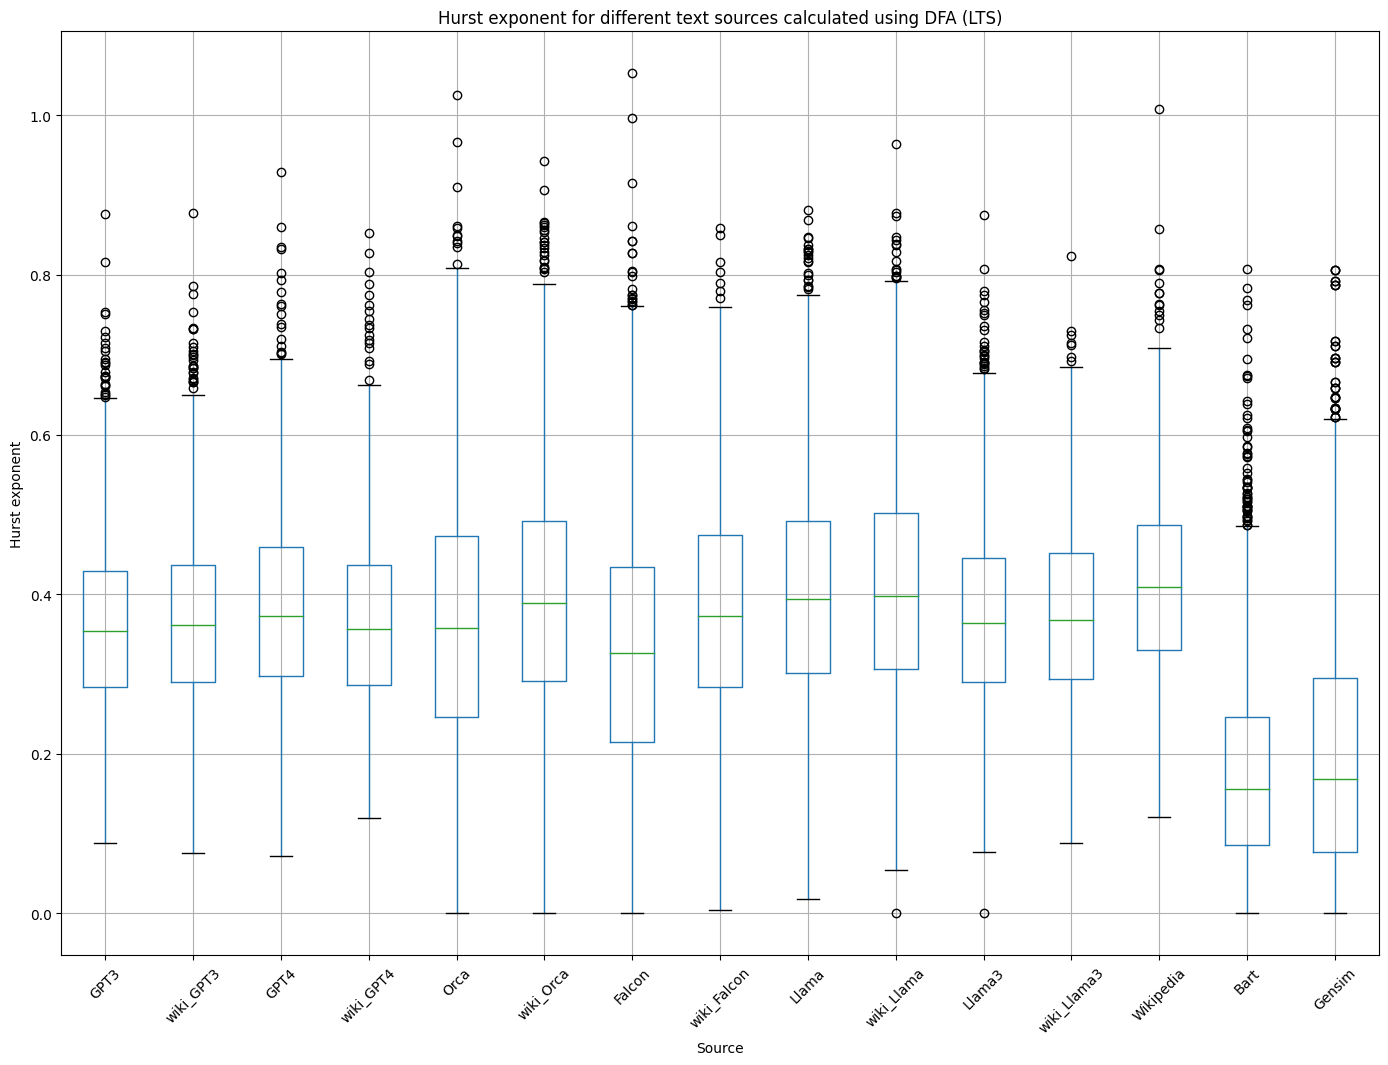

In [162]:
h_df_dfa_lts = load_or_create_h_df_filename_dfa_lts(df_text)
h_df_dfa_lts.info()
h_df_dfa_lts.head()
box_plot(h_df_dfa_lts, 'DFA (LTS)')

In [163]:
#outliers = find_outliers(h_df_dfa_pos, 3)
#print_outliers(df, outliers)

AFA

In [164]:
from helpers.TimeSeries import construct_its
from algorithms.AFA.AFA import perform_afa

def afa_calculate_cell_pos(cell, ranges):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    its = construct_its(cell)
    estimated_h = perform_afa(its, ranges)
    return estimated_h

In [165]:
from helpers.TimeSeries import construct_its
from algorithms.AFA.AFA import perform_afa
from helpers.TextManipulations import perform_text_preprocessing
from helpers.TextManipulations import tokenize_text
from helpers.TimeSeries import construct_fts_from_tokens



def afa_calculate_cell_fts(cell, ranges):
    #print(cell)
    text_cleaned = perform_text_preprocessing(cell)
    token_words = tokenize_text(text_cleaned)
    fts = construct_fts_from_tokens(token_words)
    its = construct_its(fts)
    estimated_h = perform_afa(its, ranges)
    return estimated_h

In [166]:
from helpers.TimeSeries import construct_its
from algorithms.AFA.AFA import perform_afa
from helpers.TextManipulations import perform_text_preprocessing
from helpers.TextManipulations import tokenize_text
from helpers.TimeSeries import construct_lts_from_tokens



def afa_calculate_cell_lts(cell, ranges):
    #print(cell)
    text_cleaned = perform_text_preprocessing(cell)
    token_words = tokenize_text(text_cleaned)
    lts = construct_lts_from_tokens(token_words)
    its = construct_its(lts)
    estimated_h = perform_afa(its, ranges)
    return estimated_h

In [167]:
import os

h_df_filename_afa_pos = 'h_df_afa_pos.csv'

def load_or_create_h_df_filename_afa_pos(pos_df_list):
    if os.path.exists(h_df_filename_afa_pos):
        h_df = pd.read_csv(h_df_filename_afa_pos)
    else:
        h_df = pos_df_list.applymap(lambda x: afa_calculate_cell_pos(x, [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140]))    
        h_df.to_csv(h_df_filename_afa_pos, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [168]:
h_df_afa_pos = load_or_create_h_df_filename_afa_pos(pos_df_list)
h_df_afa_pos.info()
h_df_afa_pos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         2438 non-null   float64
 1   wiki_pos_gpt3    2438 non-null   float64
 2   pos_gpt4         2438 non-null   float64
 3   wiki_pos_gpt4    2438 non-null   float64
 4   pos_orca         2425 non-null   float64
 5   wiki_pos_orca    2417 non-null   float64
 6   pos_falcon       2432 non-null   float64
 7   wiki_pos_falcon  2438 non-null   float64
 8   pos_llama        2438 non-null   float64
 9   wiki_pos_llama   2438 non-null   float64
 10  pos_llama3       2437 non-null   float64
 11  wiki_pos_llama3  2438 non-null   float64
 12  text_pos         2438 non-null   float64
 13  bart_pos         2436 non-null   float64
 14  gensim_pos       2316 non-null   float64
dtypes: float64(15)
memory usage: 285.8 KB


,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,bart_pos,gensim_pos
0,0.367889,0.303757,0.376450,0.257100,0.189205,0.448741,0.304533,0.377114,0.163779,0.279251,0.125692,0.367202,0.209410,0.532159,0.297210
1,0.190160,0.297888,0.314106,0.185094,0.342010,0.232519,0.517241,0.169819,0.447577,0.194448,0.048822,0.132518,0.122972,0.061985,NaN
2,0.334891,0.143991,0.236717,0.209392,0.223341,0.506294,0.593623,0.274620,0.217410,0.440653,0.087992,0.272423,0.214994,0.281957,0.571344
3,0.155907,0.217324,0.145449,0.145270,0.195307,0.228297,0.303382,0.320019,0.358610,0.130807,0.065282,-0.012495,0.054504,0.223751,0.223063
4,0.124121,0.089651,0.237775,0.186518,0.554437,0.448719,0.053932,0.243162,0.478419,0.172634,0.105044,0.360629,0.682281,1.632039,NaN


In [169]:
pos_df_list.info()
pos_df_list.head()
h_df_afa_pos_bart = pos_df_list['bart_pos']
h_df_afa_pos_bart = pd.DataFrame(h_df_afa_pos_bart)
h_df_afa_pos_bart.info()
h_df_afa_pos_bart.head()
h_df_afa_pos_bart.iloc[0:3,:].head()
h_df_afa_pos_bart_c = load_or_create_h_df_filename_afa_pos(h_df_afa_pos_bart.iloc[0:3,:])
h_df_afa_pos_bart_c.info()
h_df_afa_pos_bart_c.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pos_gpt3         2438 non-null   object
 1   wiki_pos_gpt3    2438 non-null   object
 2   pos_gpt4         2438 non-null   object
 3   wiki_pos_gpt4    2438 non-null   object
 4   pos_orca         2438 non-null   object
 5   wiki_pos_orca    2438 non-null   object
 6   pos_falcon       2438 non-null   object
 7   wiki_pos_falcon  2438 non-null   object
 8   pos_llama        2438 non-null   object
 9   wiki_pos_llama   2438 non-null   object
 10  pos_llama3       2438 non-null   object
 11  wiki_pos_llama3  2438 non-null   object
 12  text_pos         2438 non-null   object
 13  bart_pos         2438 non-null   object
 14  gensim_pos       2438 non-null   object
dtypes: object(15)
memory usage: 304.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 1

,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,bart_pos,gensim_pos
0,0.367889,0.303757,0.376450,0.257100,0.189205,0.448741,0.304533,0.377114,0.163779,0.279251,0.125692,0.367202,0.209410,0.532159,0.297210
1,0.190160,0.297888,0.314106,0.185094,0.342010,0.232519,0.517241,0.169819,0.447577,0.194448,0.048822,0.132518,0.122972,0.061985,NaN
2,0.334891,0.143991,0.236717,0.209392,0.223341,0.506294,0.593623,0.274620,0.217410,0.440653,0.087992,0.272423,0.214994,0.281957,0.571344
3,0.155907,0.217324,0.145449,0.145270,0.195307,0.228297,0.303382,0.320019,0.358610,0.130807,0.065282,-0.012495,0.054504,0.223751,0.223063
4,0.124121,0.089651,0.237775,0.186518,0.554437,0.448719,0.053932,0.243162,0.478419,0.172634,0.105044,0.360629,0.682281,1.632039,NaN


In [170]:
import os

h_df_filename_afa_lts = 'h_df_afa_lts.csv'

def load_or_create_h_df_filename_afa_lts(df_text):
    if os.path.exists(h_df_filename_afa_lts):
        h_df = pd.read_csv(h_df_filename_afa_lts)
    else:
        h_df = df_text.applymap(lambda x: afa_calculate_cell_lts(x, [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140]) if pd.notnull(x) else x)    
        h_df.to_csv(h_df_filename_afa_lts, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [171]:
h_df_afa_lts = load_or_create_h_df_filename_afa_lts(df_text)
h_df_afa_lts.info()
h_df_afa_lts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         2438 non-null   float64
 1   wiki_GPT3    2438 non-null   float64
 2   GPT4         2438 non-null   float64
 3   wiki_GPT4    2438 non-null   float64
 4   Orca         2424 non-null   float64
 5   wiki_Orca    2416 non-null   float64
 6   Falcon       2428 non-null   float64
 7   wiki_Falcon  2438 non-null   float64
 8   Llama        2438 non-null   float64
 9   wiki_Llama   2437 non-null   float64
 10  Llama3       2437 non-null   float64
 11  wiki_Llama3  2438 non-null   float64
 12  Wikipedia    940 non-null    float64
 13  Bart         2431 non-null   float64
 14  Gensim       2210 non-null   float64
dtypes: float64(15)
memory usage: 285.8 KB


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.223929,0.211666,0.454131,0.068789,0.350300,0.167653,0.291638,0.257459,0.090986,0.145210,0.140632,-0.006896,0.055255,0.249481,0.342836
1,0.196880,0.200264,0.272786,0.448663,0.391901,0.061106,0.188965,0.062135,0.254645,0.157382,0.306207,0.191972,0.364826,0.078289,NaN
2,0.208560,0.157290,0.269683,0.374985,0.248801,0.280119,0.241683,0.231051,0.366783,0.177029,0.297488,0.105110,0.255264,0.116343,0.269762
3,0.168596,0.115990,0.131449,0.234186,0.227525,0.411186,0.329759,0.281277,0.187823,0.624081,0.144619,0.279435,-0.004219,0.232093,0.172010
4,0.135288,0.158501,0.461244,0.358866,0.621397,0.130787,0.814695,0.010069,0.566222,0.163663,0.294942,0.267813,1.204632,NaN,NaN


In [172]:
import os

h_df_filename_afa_fts = 'h_df_afa_fts.csv'

def load_or_create_h_df_filename_afa_fts(df_text):
    if os.path.exists(h_df_filename_afa_fts):
        h_df = pd.read_csv(h_df_filename_afa_fts)
    else:
        h_df = df_text.applymap(lambda x: afa_calculate_cell_fts(x, [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140])if pd.notnull(x) else x)    
        h_df.to_csv(h_df_filename_afa_fts, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [173]:
h_df_afa_fts = load_or_create_h_df_filename_afa_fts(df_text)
h_df_afa_fts.info()
h_df_afa_fts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         2438 non-null   float64
 1   wiki_GPT3    2438 non-null   float64
 2   GPT4         2438 non-null   float64
 3   wiki_GPT4    2438 non-null   float64
 4   Orca         2424 non-null   float64
 5   wiki_Orca    2416 non-null   float64
 6   Falcon       2428 non-null   float64
 7   wiki_Falcon  2438 non-null   float64
 8   Llama        2438 non-null   float64
 9   wiki_Llama   2437 non-null   float64
 10  Llama3       2437 non-null   float64
 11  wiki_Llama3  2438 non-null   float64
 12  Wikipedia    940 non-null    float64
 13  Bart         2430 non-null   float64
 14  Gensim       2210 non-null   float64
dtypes: float64(15)
memory usage: 285.8 KB


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.307968,0.327876,0.367153,0.353381,0.492727,0.602709,0.030544,0.248244,0.456285,0.700125,0.164183,0.347047,0.204306,0.625833,0.293683
1,0.187122,0.036516,0.256626,0.396424,0.347123,0.289582,0.309314,0.277772,0.128590,0.193621,0.412790,0.169275,0.327218,0.580295,NaN
2,0.297714,0.318298,0.174798,0.175115,0.080948,0.421922,0.009616,0.250838,0.171371,0.511045,0.514654,0.136571,0.189812,0.378450,0.331871
3,0.206019,0.171769,0.241156,0.294320,0.455096,0.261119,0.169091,0.290191,0.430358,0.134404,0.234673,0.140212,0.046480,0.450300,0.246330
4,0.063761,0.114492,0.312592,0.091547,0.450951,0.026111,0.175878,0.020979,0.421662,0.598690,0.131661,0.287041,1.090595,NaN,NaN


In [174]:
h_df_afa_fts_bart = df_text['Bart']
h_df_afa_fts_bart = pd.DataFrame(h_df_afa_fts_bart)
h_df_afa_fts_bart.info()
h_df_afa_fts_bart.head()
h_df_afa_fts_bart = load_or_create_h_df_filename_afa_fts(h_df_afa_fts_bart.iloc[:,:3])
h_df_afa_fts_bart.info()
h_df_afa_fts_bart.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Bart    2438 non-null   object
dtypes: object(1)
memory usage: 38.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         2438 non-null   float64
 1   wiki_GPT3    2438 non-null   float64
 2   GPT4         2438 non-null   float64
 3   wiki_GPT4    2438 non-null   float64
 4   Orca         2424 non-null   float64
 5   wiki_Orca    2416 non-null   float64
 6   Falcon       2428 non-null   float64
 7   wiki_Falcon  2438 non-null   float64
 8   Llama        2438 non-null   float64
 9   wiki_Llama   2437 non-null   float64
 10  Llama3       2437 non-null   float64
 11  wiki_Llama3  2438 non-null   float64
 12  Wikipedia    940 non-null    float64
 13  Bart    

,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.307968,0.327876,0.367153,0.353381,0.492727,0.602709,0.030544,0.248244,0.456285,0.700125,0.164183,0.347047,0.204306,0.625833,0.293683
1,0.187122,0.036516,0.256626,0.396424,0.347123,0.289582,0.309314,0.277772,0.128590,0.193621,0.412790,0.169275,0.327218,0.580295,NaN
2,0.297714,0.318298,0.174798,0.175115,0.080948,0.421922,0.009616,0.250838,0.171371,0.511045,0.514654,0.136571,0.189812,0.378450,0.331871
3,0.206019,0.171769,0.241156,0.294320,0.455096,0.261119,0.169091,0.290191,0.430358,0.134404,0.234673,0.140212,0.046480,0.450300,0.246330
4,0.063761,0.114492,0.312592,0.091547,0.450951,0.026111,0.175878,0.020979,0.421662,0.598690,0.131661,0.287041,1.090595,NaN,NaN


In [175]:
#outliers = find_outliers(h_df_afa_fts, 1)
#print_outliers(df, outliers)

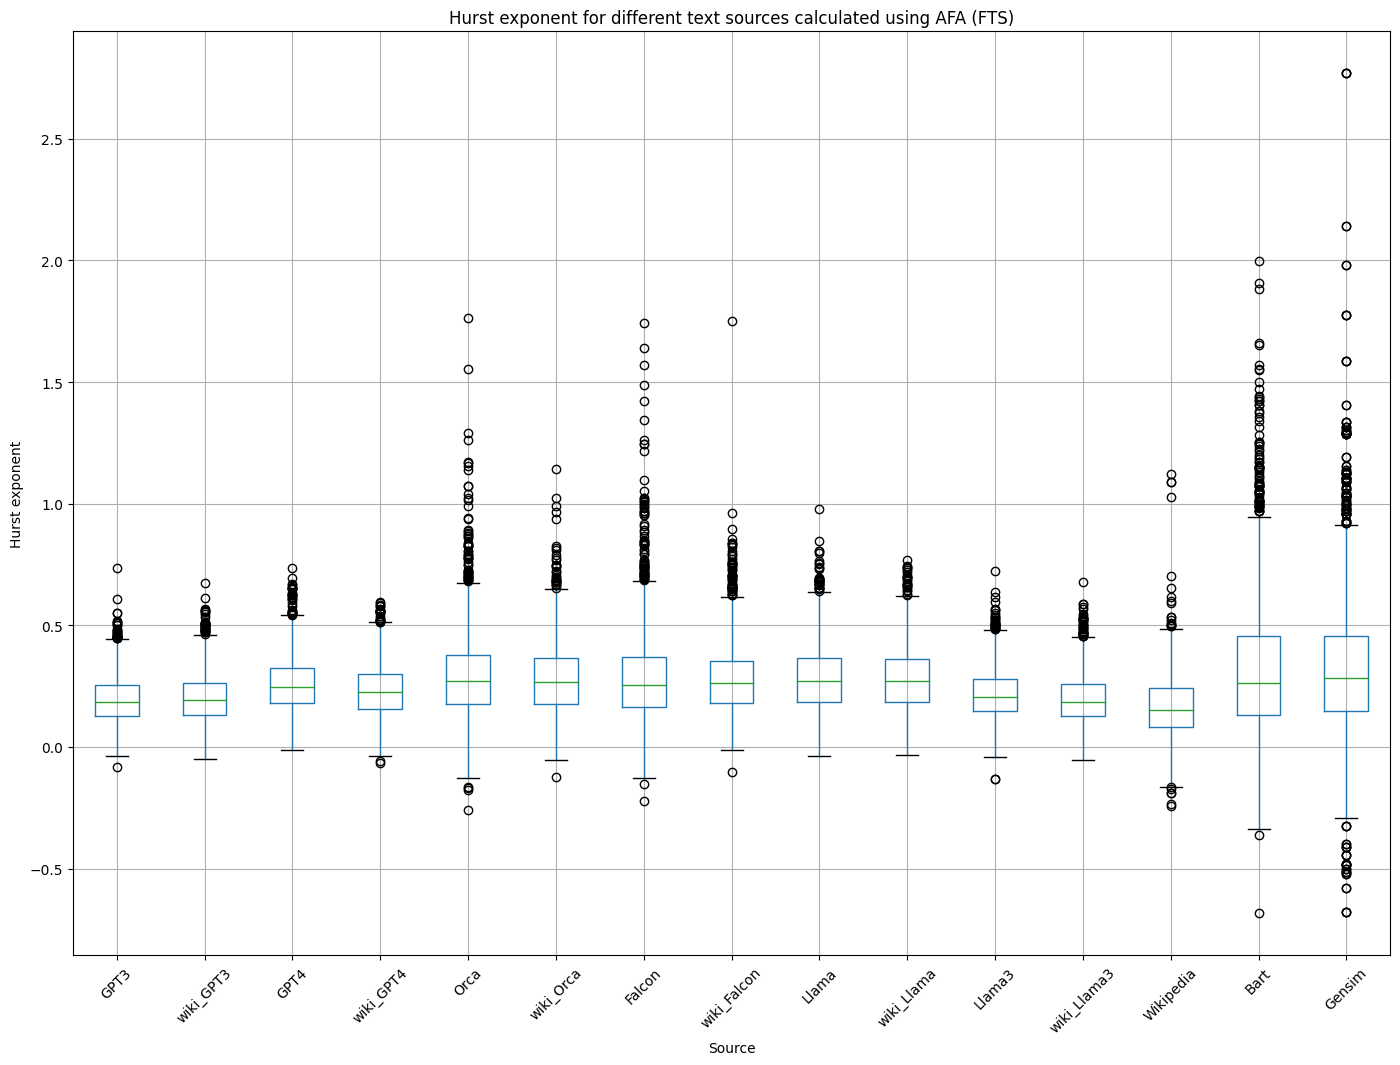

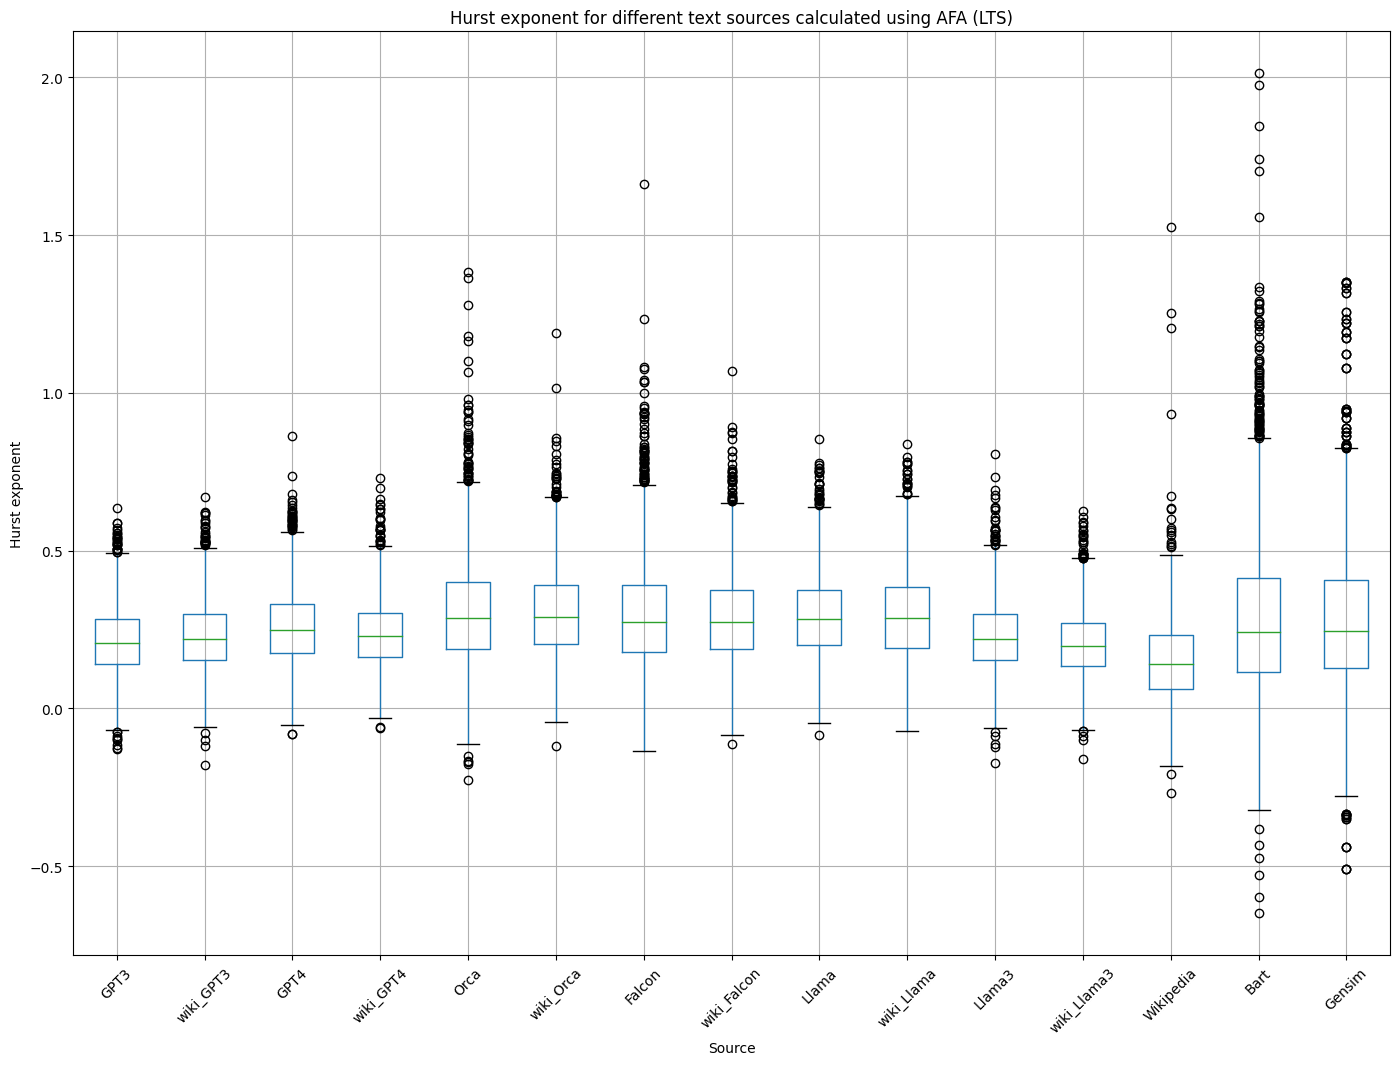

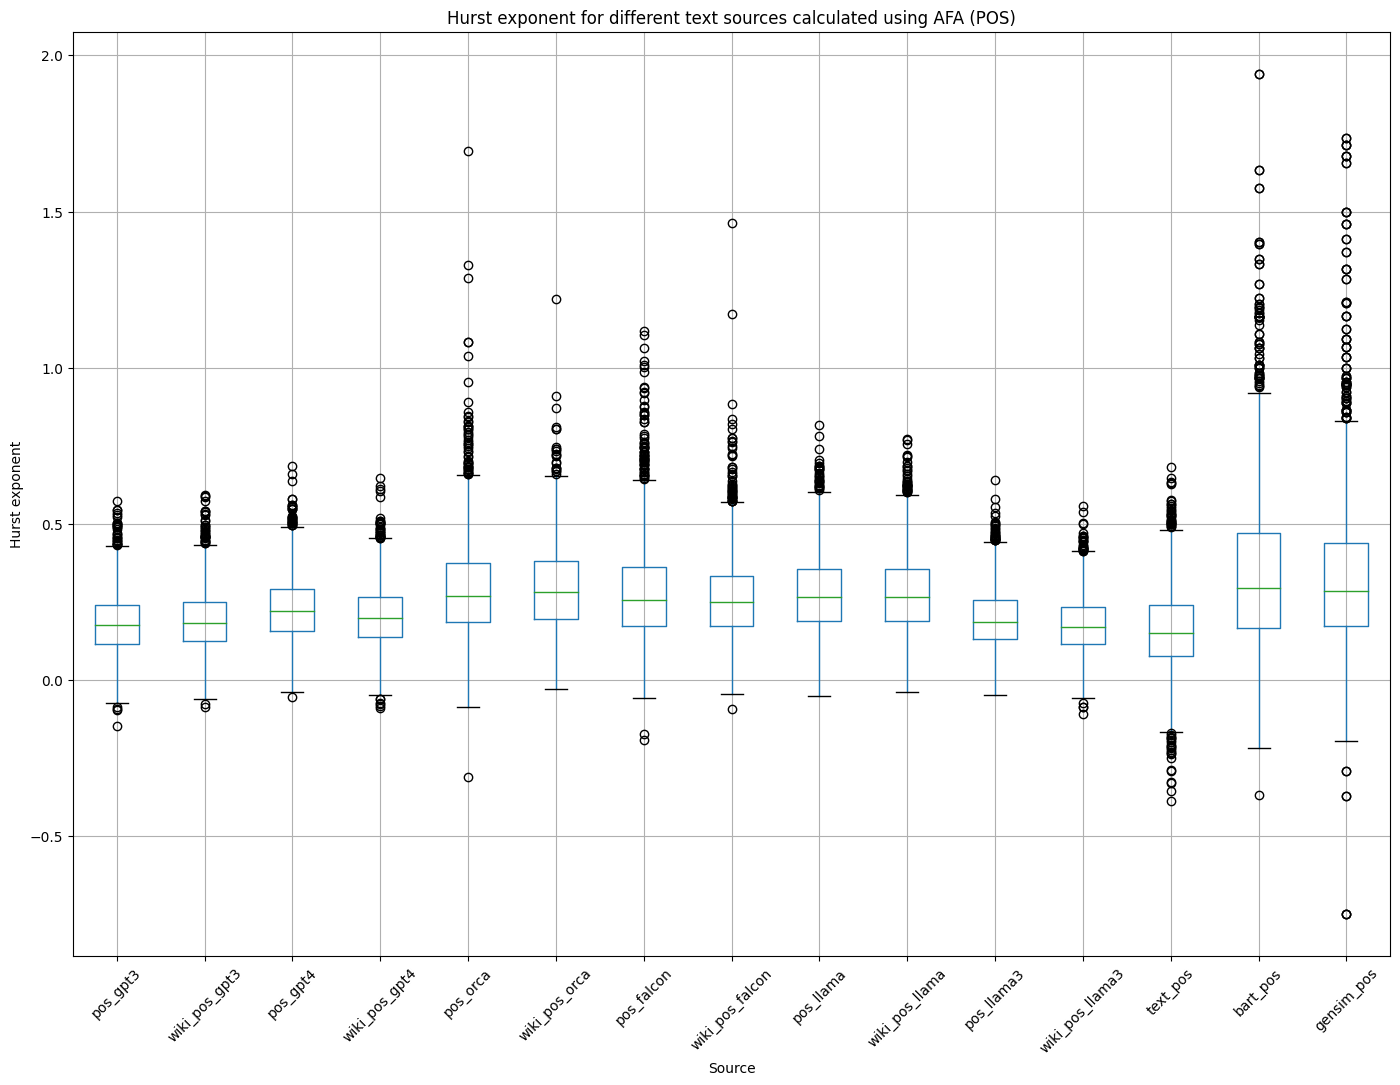

In [176]:
box_plot(h_df_afa_fts, 'AFA (FTS)')
box_plot(h_df_afa_lts, 'AFA (LTS)')
box_plot(h_df_afa_pos, 'AFA (POS)')

RRA

In [177]:
from helpers.TimeSeries import normalize
from helpers.TimeSeries import construct_its_from_normalized_ts
from algorithms.RRA.RRA import perform_rra

def rra_calculate_cell_pos(cell):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    ts_normalized = normalize(cell)
    its = construct_its_from_normalized_ts(ts_normalized)
    estimated_h = perform_rra(its, ts_normalized)
    return estimated_h

In [178]:
from helpers.TimeSeries import normalize
from algorithms.RRA.RRA import perform_rra
from helpers.TextManipulations import perform_text_preprocessing
from helpers.TimeSeries import construct_fts_from_tokens
from helpers.TextManipulations import tokenize_text

def rra_calculate_cell_fts(cell):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    text_cleaned = perform_text_preprocessing(cell)
    token_words = tokenize_text(text_cleaned)
    fts = construct_fts_from_tokens(token_words)
    ts_normalized = normalize(fts)
    its = construct_its_from_normalized_ts(ts_normalized)
    estimated_h = perform_rra(its, ts_normalized)
    return estimated_h

In [179]:
from helpers.TimeSeries import normalize
from algorithms.RRA.RRA import perform_rra
from helpers.TextManipulations import perform_text_preprocessing
from helpers.TimeSeries import construct_lts_from_tokens
from helpers.TextManipulations import tokenize_text

def rra_calculate_cell_lts(cell):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    text_cleaned = perform_text_preprocessing(cell)
    token_words = tokenize_text(text_cleaned)
    lts = construct_lts_from_tokens(token_words)
    ts_normalized = normalize(lts)
    its = construct_its_from_normalized_ts(ts_normalized)
    estimated_h = perform_rra(its, ts_normalized)
    return estimated_h

In [180]:
h_df_filename_rra_pos = 'h_df_rra_pos.csv'

def load_or_create_h_df_filename_rra_pos(pos_df_list):
    if os.path.exists(h_df_filename_rra_pos):
        h_df = pd.read_csv(h_df_filename_rra_pos)
    else:
        h_df = pos_df_list.applymap(rra_calculate_cell_pos)   
        h_df.to_csv(h_df_filename_rra_pos, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [181]:
h_df_filename_rra_lts = 'h_df_rra_lts.csv'

def load_or_create_h_df_filename_rra_lts(df_text):
    if os.path.exists(h_df_filename_rra_lts):
        h_df = pd.read_csv(h_df_filename_rra_lts)
    else:
        h_df = df_text.applymap(lambda x: rra_calculate_cell_lts(x) if pd.notnull(x) else x)   
        h_df.to_csv(h_df_filename_rra_lts, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [182]:
h_df_filename_rra_fts = 'h_df_rra_fts.csv'

def load_or_create_h_df_filename_rra_fts(df_text):
    if os.path.exists(h_df_filename_rra_fts):
        h_df = pd.read_csv(h_df_filename_rra_fts)
    else:
        h_df = df_text.applymap(lambda x: rra_calculate_cell_fts(x) if pd.notnull(x) else x)      
        h_df.to_csv(h_df_filename_rra_fts, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [183]:
h_df_rra_pos = load_or_create_h_df_filename_rra_pos(pos_df_list)
h_df_rra_pos.info()
h_df_rra_pos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         2438 non-null   float64
 1   wiki_pos_gpt3    2438 non-null   float64
 2   pos_gpt4         2438 non-null   float64
 3   wiki_pos_gpt4    2438 non-null   float64
 4   pos_orca         2438 non-null   float64
 5   wiki_pos_orca    2435 non-null   float64
 6   pos_falcon       2432 non-null   float64
 7   wiki_pos_falcon  2438 non-null   float64
 8   pos_llama        2438 non-null   float64
 9   wiki_pos_llama   2438 non-null   float64
 10  pos_llama3       2438 non-null   float64
 11  wiki_pos_llama3  2438 non-null   float64
 12  text_pos         2438 non-null   float64
 13  bart_pos         2438 non-null   float64
 14  gensim_pos       2418 non-null   float64
dtypes: float64(15)
memory usage: 285.8 KB


,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,bart_pos,gensim_pos
0,0.568857,0.625814,0.648996,0.445265,0.577301,0.653786,0.574087,0.670758,0.462178,0.533370,0.615364,0.642561,0.574153,0.780939,0.618909
1,0.513762,0.454937,0.585142,0.487270,0.706383,0.619046,0.644570,0.590531,0.619429,0.660133,0.505824,0.502387,0.530692,0.667083,0.425842
2,0.625112,0.475646,0.616498,0.551816,0.608498,0.596052,0.632380,0.579613,0.614589,0.679210,0.525707,0.487209,0.763292,0.731614,0.808873
3,0.542602,0.506067,0.631895,0.608186,0.517663,0.553370,0.584186,0.622216,0.651382,0.449492,0.549626,0.597593,0.615652,0.533181,0.627242
4,0.517482,0.525610,0.547695,0.507761,0.653373,0.582894,0.580850,0.479076,0.557255,0.606849,0.500859,0.608339,0.714955,0.846917,NaN


In [184]:
h_df_rra_lts = load_or_create_h_df_filename_rra_lts(df_text)
h_df_rra_lts.info()
h_df_rra_lts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         2438 non-null   float64
 1   wiki_GPT3    2438 non-null   float64
 2   GPT4         2438 non-null   float64
 3   wiki_GPT4    2438 non-null   float64
 4   Orca         2438 non-null   float64
 5   wiki_Orca    2434 non-null   float64
 6   Falcon       2432 non-null   float64
 7   wiki_Falcon  2438 non-null   float64
 8   Llama        2438 non-null   float64
 9   wiki_Llama   2438 non-null   float64
 10  Llama3       2438 non-null   float64
 11  wiki_Llama3  2438 non-null   float64
 12  Wikipedia    940 non-null    float64
 13  Bart         2438 non-null   float64
 14  Gensim       2418 non-null   float64
dtypes: float64(15)
memory usage: 285.8 KB


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.522335,0.433257,0.638503,0.668732,0.519305,0.321089,0.437310,0.563653,0.462352,0.537756,0.573143,0.501830,0.510151,0.582156,0.518124
1,0.575100,0.648862,0.523750,0.641024,0.569401,0.475555,0.530598,0.488019,0.638996,0.555403,0.569893,0.534832,0.583239,0.595646,0.422380
2,0.480974,0.504511,0.538748,0.565924,0.582168,0.580126,0.573951,0.590639,0.614461,0.578977,0.530061,0.484267,0.572582,0.499100,0.691967
3,0.486081,0.483152,0.428061,0.461571,0.565018,0.638079,0.549253,0.542015,0.552556,0.625273,0.386853,0.559564,0.505923,0.483750,0.446459
4,0.569638,0.562881,0.600891,0.635144,0.559705,0.576457,0.640328,0.494272,0.558576,0.489783,0.615136,0.513907,0.824930,0.603450,NaN


In [185]:
h_df_rra_fts = load_or_create_h_df_filename_rra_fts(df_text)
h_df_rra_fts.info()
h_df_rra_fts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         2438 non-null   float64
 1   wiki_GPT3    2438 non-null   float64
 2   GPT4         2438 non-null   float64
 3   wiki_GPT4    2438 non-null   float64
 4   Orca         2435 non-null   float64
 5   wiki_Orca    2429 non-null   float64
 6   Falcon       2432 non-null   float64
 7   wiki_Falcon  2438 non-null   float64
 8   Llama        2438 non-null   float64
 9   wiki_Llama   2437 non-null   float64
 10  Llama3       2437 non-null   float64
 11  wiki_Llama3  2438 non-null   float64
 12  Wikipedia    940 non-null    float64
 13  Bart         2437 non-null   float64
 14  Gensim       2387 non-null   float64
dtypes: float64(15)
memory usage: 285.8 KB


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.560956,0.603734,0.575469,0.629688,0.576617,0.691175,0.516875,0.529530,0.650713,0.653292,0.543500,0.573605,0.646372,0.508068,0.493322
1,0.518657,0.574706,0.481177,0.545498,0.517508,0.548861,0.650572,0.490978,0.359449,0.458022,0.604354,0.418813,0.522942,0.630305,0.287005
2,0.550323,0.551889,0.581536,0.583947,0.382672,0.535827,0.443937,0.500472,0.454630,0.590437,0.566691,0.573832,0.493988,0.611473,0.588922
3,0.522111,0.423562,0.532031,0.509764,0.514948,0.546231,0.596171,0.477692,0.531504,0.349944,0.516008,0.522294,0.580620,0.655910,0.507184
4,0.486689,0.490127,0.591602,0.677828,0.593218,0.487555,0.546508,0.440625,0.753250,0.585624,0.550733,0.556511,0.830667,0.580964,NaN


In [186]:
#outliers = find_outliers(h_df_rra_fts, 2.5)
#print_outliers(df, outliers)

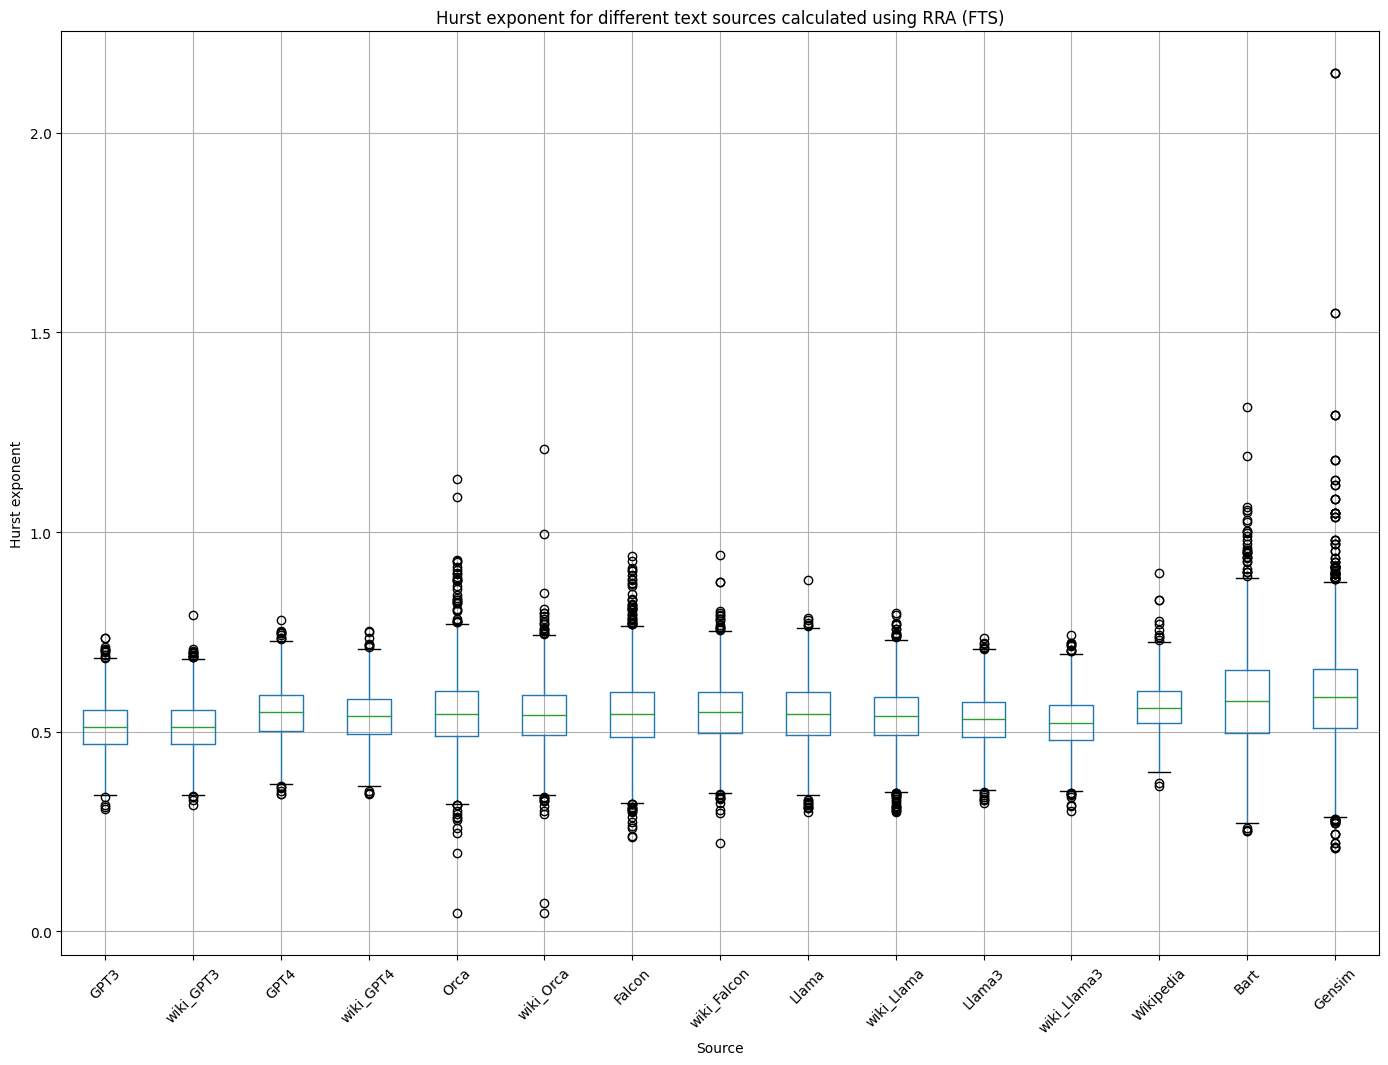

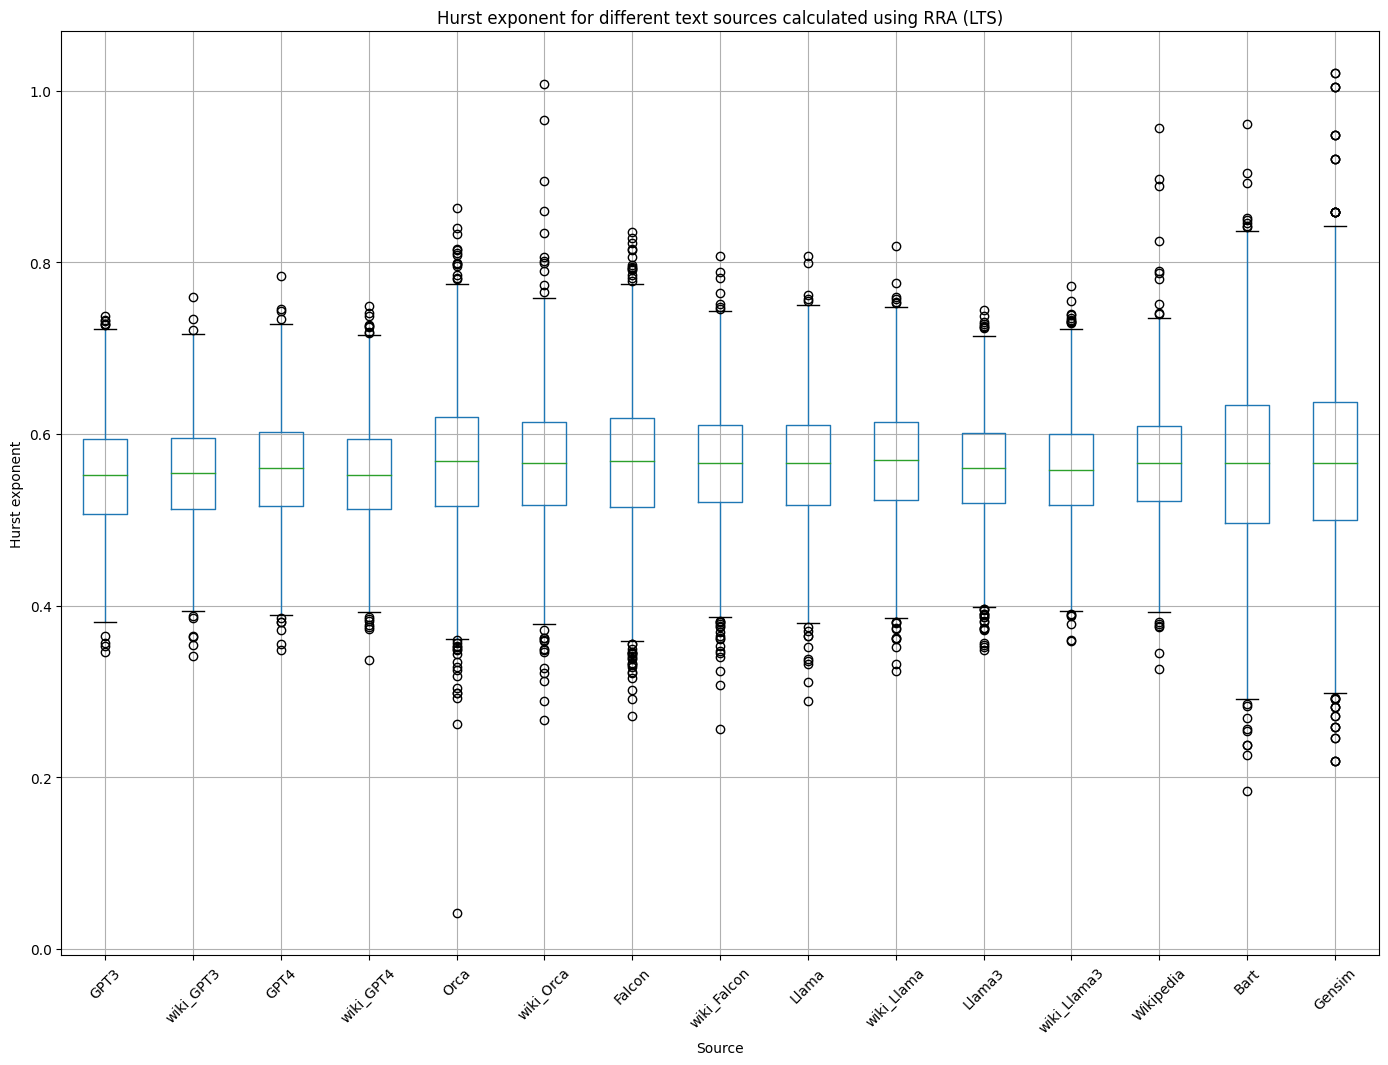

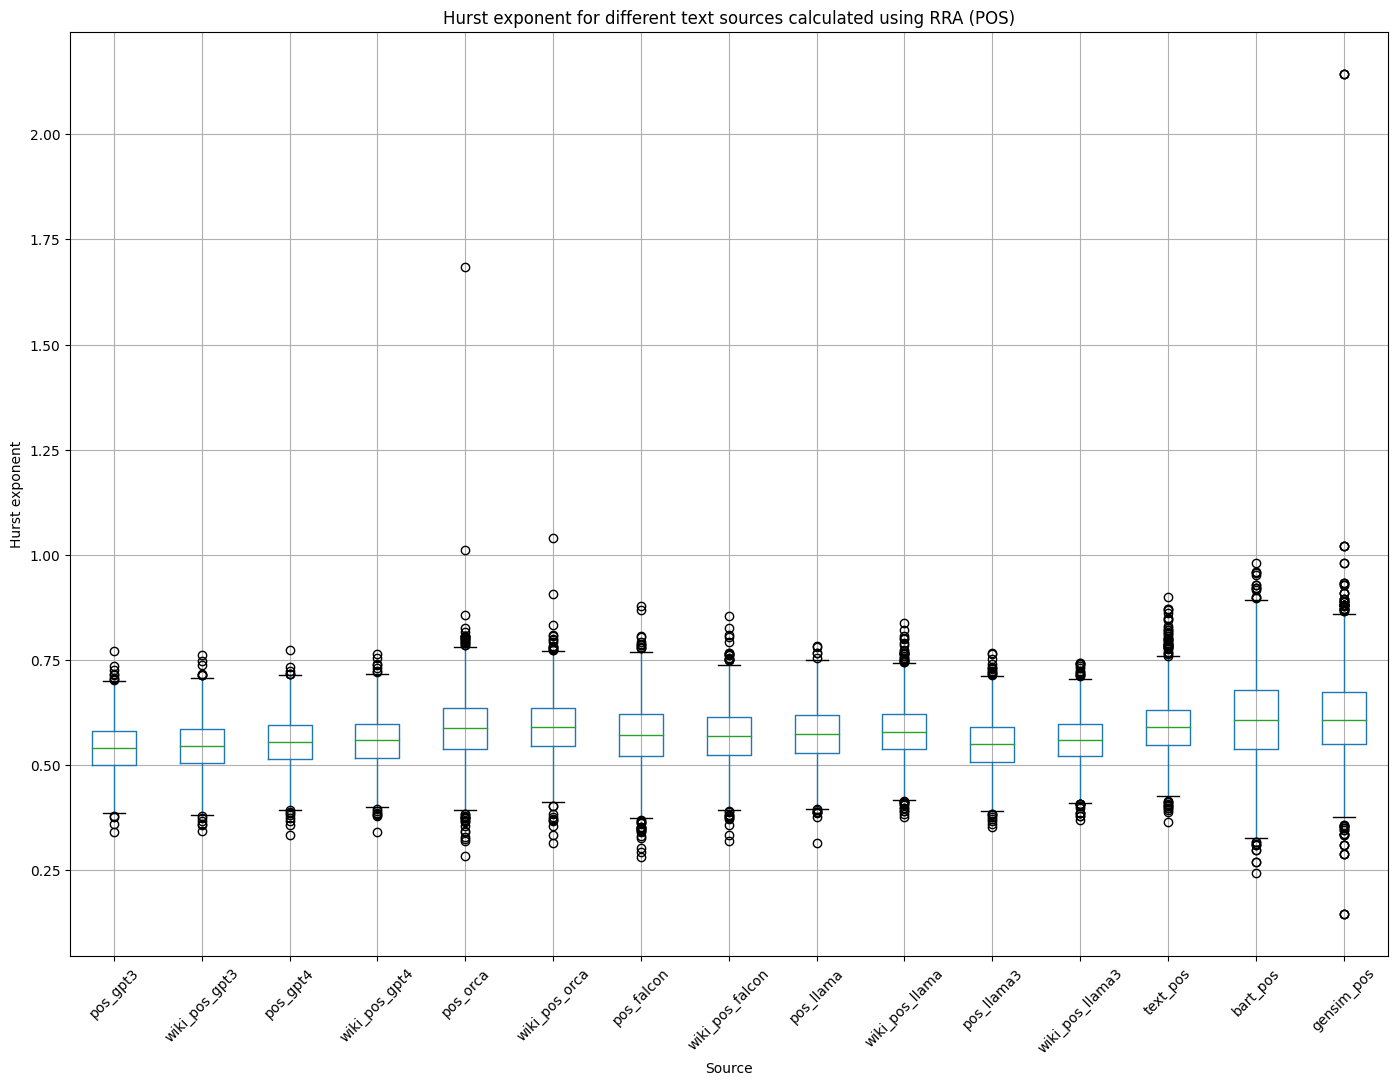

In [187]:
box_plot(h_df_rra_fts, 'RRA (FTS)')
box_plot(h_df_rra_lts, 'RRA (LTS)')
box_plot(h_df_rra_pos, 'RRA (POS)')

Same as above but on combined cells

DFA

In [188]:
def merge_lists_pos(pos_df_list):
    pos_df_list_combined = pd.DataFrame()
    for col in pos_df_list.columns:
        temp = []
        for cell_value in pos_df_list[col]:
            temp.extend(cell_value)
        pos_df_list_combined[col] = [temp]
    return pos_df_list_combined
        
pos_df_list_combined = merge_lists_pos(pos_df_list)
pos_df_list_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pos_gpt3         1 non-null      object
 1   wiki_pos_gpt3    1 non-null      object
 2   pos_gpt4         1 non-null      object
 3   wiki_pos_gpt4    1 non-null      object
 4   pos_orca         1 non-null      object
 5   wiki_pos_orca    1 non-null      object
 6   pos_falcon       1 non-null      object
 7   wiki_pos_falcon  1 non-null      object
 8   pos_llama        1 non-null      object
 9   wiki_pos_llama   1 non-null      object
 10  pos_llama3       1 non-null      object
 11  wiki_pos_llama3  1 non-null      object
 12  text_pos         1 non-null      object
 13  bart_pos         1 non-null      object
 14  gensim_pos       1 non-null      object
dtypes: object(15)
memory usage: 248.0+ bytes


In [189]:
import pandas as pd

def merge_lists_text(df_text):
    text_df_list_combined = pd.DataFrame()
    for col in df_text.columns:
        temp = ''
        for cell_value in df_text[col]:
            if pd.notna(cell_value):
                try:
                    temp = temp + cell_value
                    temp = temp + ' '
                    #print(temp)
                except Exception as e:
                    print(cell_value)
        text_df_list_combined[col] = [temp]
    return text_df_list_combined
    
df_text_combined = merge_lists_text(df_text)
df_text_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GPT3         1 non-null      object
 1   wiki_GPT3    1 non-null      object
 2   GPT4         1 non-null      object
 3   wiki_GPT4    1 non-null      object
 4   Orca         1 non-null      object
 5   wiki_Orca    1 non-null      object
 6   Falcon       1 non-null      object
 7   wiki_Falcon  1 non-null      object
 8   Llama        1 non-null      object
 9   wiki_Llama   1 non-null      object
 10  Llama3       1 non-null      object
 11  wiki_Llama3  1 non-null      object
 12  Wikipedia    1 non-null      object
 13  Bart         1 non-null      object
 14  Gensim       1 non-null      object
dtypes: object(15)
memory usage: 248.0+ bytes


In [190]:
print(type(df_text_combined))
#print(type(df_text))

<class 'pandas.core.frame.DataFrame'>


In [191]:
h_df_filename_dfa_combined = 'h_df_dfa_combined.csv'

def load_or_create_h_df_filename_dfa_combined(pos_df_list):
    if os.path.exists(h_df_filename_dfa_combined):
        h_df = pd.read_csv(h_df_filename_dfa_combined)
    else:
        h_df = pos_df_list.applymap(lambda x: dfa_calculate_cell_pos(x, [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]))   
        h_df.to_csv(h_df_filename_dfa_combined, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [192]:
h_df_dfa_combined = load_or_create_h_df_filename_dfa_combined(pos_df_list_combined)
h_df_dfa_combined.info()
h_df_dfa_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         1 non-null      float64
 1   wiki_pos_gpt3    1 non-null      float64
 2   pos_gpt4         1 non-null      float64
 3   wiki_pos_gpt4    1 non-null      float64
 4   pos_orca         1 non-null      float64
 5   wiki_pos_orca    1 non-null      float64
 6   pos_falcon       1 non-null      float64
 7   wiki_pos_falcon  1 non-null      float64
 8   pos_llama        1 non-null      float64
 9   wiki_pos_llama   1 non-null      float64
 10  pos_llama3       1 non-null      float64
 11  wiki_pos_llama3  1 non-null      float64
 12  text_pos         1 non-null      float64
 13  bart_pos         1 non-null      float64
 14  gensim_pos       1 non-null      float64
dtypes: float64(15)
memory usage: 248.0 bytes


,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,bart_pos,gensim_pos
0,0.437882,0.448973,0.458389,0.477126,0.483994,0.488697,0.478126,0.467549,0.489227,0.485038,0.465033,0.459604,0.546761,0.543441,0.531782


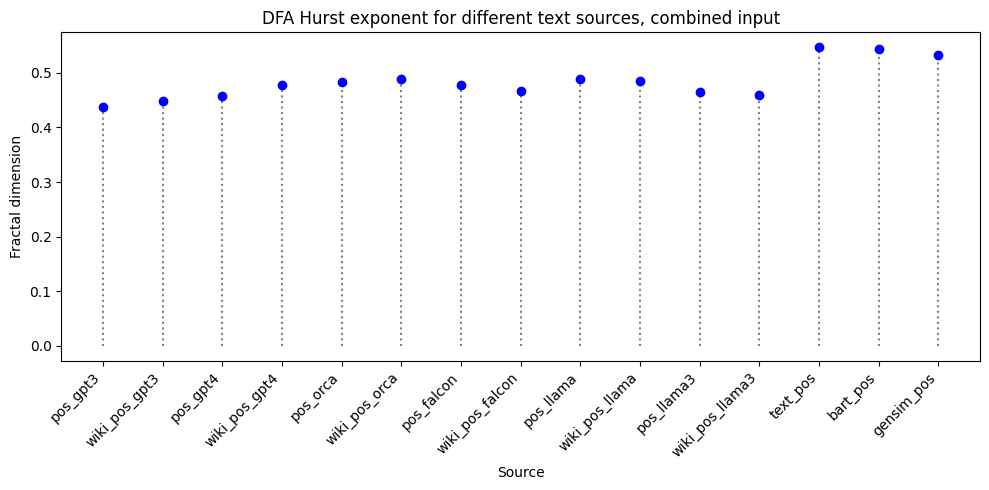

In [193]:
plot_scatter(h_df_dfa_combined.values.flatten().tolist(), pos_columns, 'DFA Hurst exponent for different text sources, combined input', 'DFA')

In [194]:
h_df_filename_dfa_combined_fts = 'h_df_dfa_combined_fts.csv'

def load_or_create_h_df_filename_dfa_combined_fts(text_df_list):
    if os.path.exists(h_df_filename_dfa_combined_fts):
        h_df = pd.read_csv(h_df_filename_dfa_combined_fts)
    else:
        h_df = text_df_list.applymap(lambda x: dfa_calculate_cell_fts(x, [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]))   
        h_df.to_csv(h_df_filename_dfa_combined_fts, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [195]:
h_df_dfa_combined_fts = load_or_create_h_df_filename_dfa_combined_fts(df_text_combined)
h_df_dfa_combined_fts.info()
h_df_dfa_combined_fts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         1 non-null      float64
 1   wiki_GPT3    1 non-null      float64
 2   GPT4         1 non-null      float64
 3   wiki_GPT4    1 non-null      float64
 4   Orca         1 non-null      float64
 5   wiki_Orca    1 non-null      float64
 6   Falcon       1 non-null      float64
 7   wiki_Falcon  1 non-null      float64
 8   Llama        1 non-null      float64
 9   wiki_Llama   1 non-null      float64
 10  Llama3       1 non-null      float64
 11  wiki_Llama3  1 non-null      float64
 12  Wikipedia    1 non-null      float64
 13  Bart         1 non-null      float64
 14  Gensim       1 non-null      float64
dtypes: float64(15)
memory usage: 248.0 bytes


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.451299,0.44573,0.514705,0.493918,0.449031,0.459551,0.492902,0.469037,0.480179,0.462699,0.463354,0.451125,0.536775,0.569311,0.556543


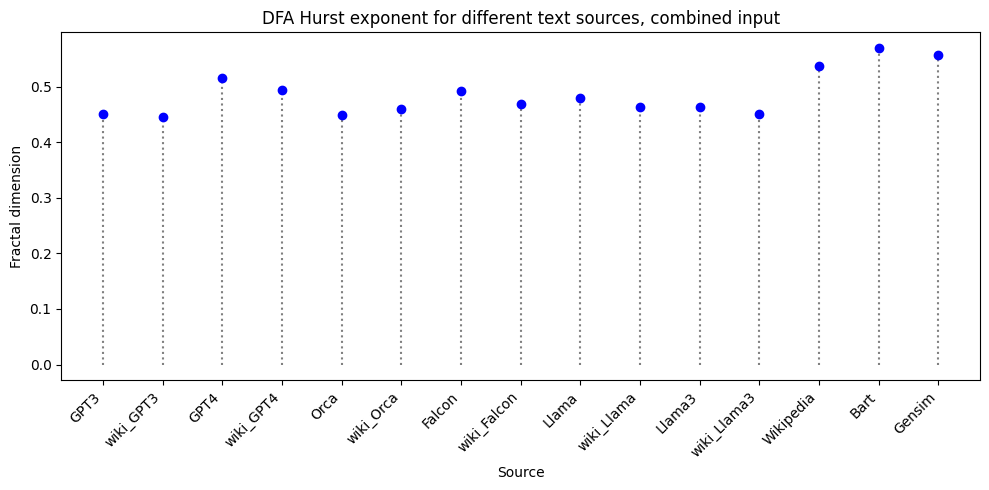

In [196]:
plot_scatter(h_df_dfa_combined_fts.values.flatten().tolist(), text_columns, 'DFA Hurst exponent for different text sources, combined input', 'DFA (FTS)')

In [197]:
h_df_filename_dfa_combined_lts = 'h_df_dfa_combined_lts.csv'

def load_or_create_h_df_filename_dfa_combined_lts(text_df_list):
    if os.path.exists(h_df_filename_dfa_combined_lts):
        h_df = pd.read_csv(h_df_filename_dfa_combined_lts)
    else:
        h_df = text_df_list.applymap(lambda x: dfa_calculate_cell_lts(x, [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]))   
        h_df.to_csv(h_df_filename_dfa_combined_lts, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [198]:
h_df_dfa_combined_lts = load_or_create_h_df_filename_dfa_combined_lts(df_text_combined)
h_df_dfa_combined_lts.info()
h_df_dfa_combined_lts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         1 non-null      float64
 1   wiki_GPT3    1 non-null      float64
 2   GPT4         1 non-null      float64
 3   wiki_GPT4    1 non-null      float64
 4   Orca         1 non-null      float64
 5   wiki_Orca    1 non-null      float64
 6   Falcon       1 non-null      float64
 7   wiki_Falcon  1 non-null      float64
 8   Llama        1 non-null      float64
 9   wiki_Llama   1 non-null      float64
 10  Llama3       1 non-null      float64
 11  wiki_Llama3  1 non-null      float64
 12  Wikipedia    1 non-null      float64
 13  Bart         1 non-null      float64
 14  Gensim       1 non-null      float64
dtypes: float64(15)
memory usage: 248.0 bytes


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.520388,0.524617,0.525108,0.526113,0.532824,0.539903,0.571591,0.539383,0.545912,0.556082,0.539351,0.521865,0.573267,0.564451,0.579324


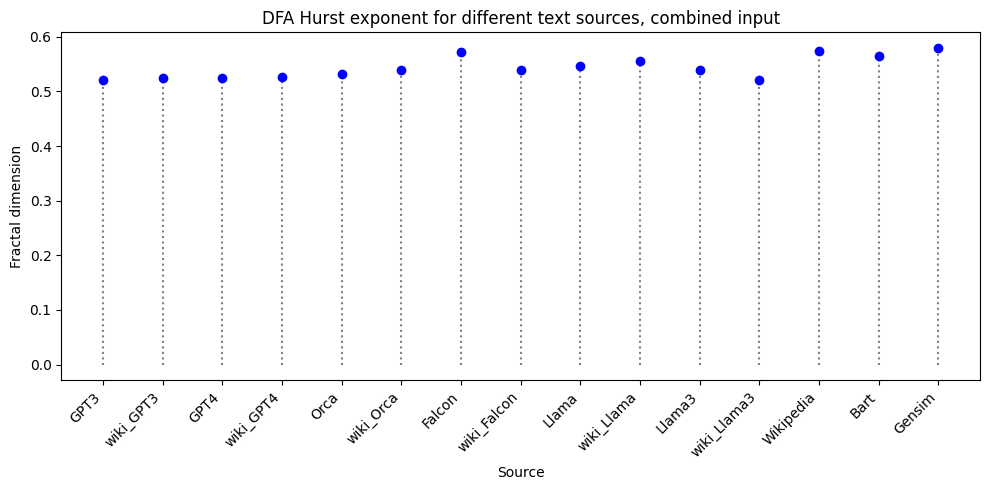

In [199]:
plot_scatter(h_df_dfa_combined_lts.values.flatten().tolist(), text_columns, 'DFA Hurst exponent for different text sources, combined input', 'DFA (LTS)')

AFA

In [200]:
h_df_filename_afa_combined_pos = 'h_df_afa_combined_pos.csv'

def load_or_create_h_df_filename_afa_combined_pos(pos_df_list):
    if os.path.exists(h_df_filename_afa_combined_pos):
        h_df = pd.read_csv(h_df_filename_afa_combined_pos)
    else:
        h_df = pos_df_list.applymap(lambda x: afa_calculate_cell_pos(x, [100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 750, 800, 900, 1000, 1100, 1200]))   
        h_df.to_csv(h_df_filename_afa_combined_pos, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [201]:
h_df_afa_combined_pos = load_or_create_h_df_filename_afa_combined_pos(pos_df_list_combined)
h_df_afa_combined_pos.info()
h_df_afa_combined_pos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         1 non-null      float64
 1   wiki_pos_gpt3    1 non-null      float64
 2   pos_gpt4         1 non-null      float64
 3   wiki_pos_gpt4    1 non-null      float64
 4   pos_orca         1 non-null      float64
 5   wiki_pos_orca    1 non-null      float64
 6   pos_falcon       1 non-null      float64
 7   wiki_pos_falcon  1 non-null      float64
 8   pos_llama        1 non-null      float64
 9   wiki_pos_llama   1 non-null      float64
 10  pos_llama3       1 non-null      float64
 11  wiki_pos_llama3  1 non-null      float64
 12  text_pos         1 non-null      float64
 13  bart_pos         1 non-null      float64
 14  gensim_pos       1 non-null      float64
dtypes: float64(15)
memory usage: 248.0 bytes


,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,bart_pos,gensim_pos
0,0.550915,0.554715,0.548271,0.563902,0.565994,0.569691,0.579708,0.596211,0.560389,0.571475,0.557569,0.580505,0.68399,0.560635,0.600161


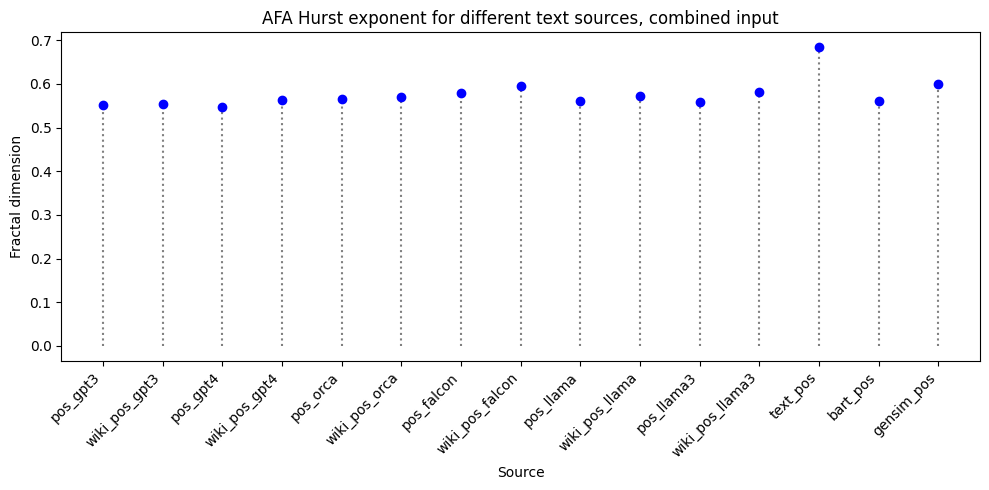

In [202]:
plot_scatter(h_df_afa_combined_pos.values.flatten().tolist(), pos_columns, 'AFA Hurst exponent for different text sources, combined input', 'AFA (POS)')

In [203]:
h_df_filename_afa_combined_fts = 'h_df_afa_combined_fts.csv'

def load_or_create_h_df_filename_afa_combined_fts(text_df_list):
    if os.path.exists(h_df_filename_afa_combined_fts):
        h_df = pd.read_csv(h_df_filename_afa_combined_fts)
    else:
        h_df = text_df_list.applymap(lambda x: afa_calculate_cell_fts(x, [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]))   
        h_df.to_csv(h_df_filename_afa_combined_fts, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [204]:
h_df_afa_combined_fts = load_or_create_h_df_filename_afa_combined_fts(df_text_combined)
h_df_afa_combined_fts.info()
h_df_afa_combined_fts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         1 non-null      float64
 1   wiki_GPT3    1 non-null      float64
 2   GPT4         1 non-null      float64
 3   wiki_GPT4    1 non-null      float64
 4   Orca         1 non-null      float64
 5   wiki_Orca    1 non-null      float64
 6   Falcon       1 non-null      float64
 7   wiki_Falcon  1 non-null      float64
 8   Llama        1 non-null      float64
 9   wiki_Llama   1 non-null      float64
 10  Llama3       1 non-null      float64
 11  wiki_Llama3  1 non-null      float64
 12  Wikipedia    1 non-null      float64
 13  Bart         1 non-null      float64
 14  Gensim       1 non-null      float64
dtypes: float64(15)
memory usage: 248.0 bytes


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.434971,0.43094,0.502277,0.480993,0.443854,0.448164,0.479421,0.461725,0.471067,0.455337,0.454901,0.438839,0.52276,0.569127,0.547071


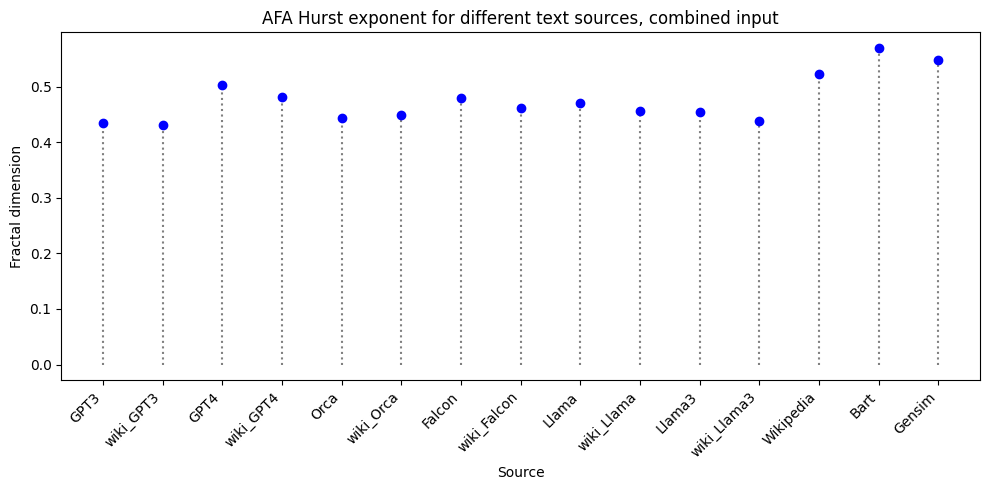

In [205]:
plot_scatter(h_df_afa_combined_fts.values.flatten().tolist(), text_columns, 'AFA Hurst exponent for different text sources, combined input', 'AFA (FTS)')

In [206]:
h_df_filename_afa_combined_lts = 'h_df_afa_combined_lts.csv'

def load_or_create_h_df_filename_afa_combined_lts(text_df_list):
    if os.path.exists(h_df_filename_afa_combined_lts):
        h_df = pd.read_csv(h_df_filename_afa_combined_lts)
    else:
        h_df = text_df_list.applymap(lambda x: afa_calculate_cell_lts(x, [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]))   
        h_df.to_csv(h_df_filename_afa_combined_lts, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [207]:
h_df_afa_combined_lts = load_or_create_h_df_filename_afa_combined_lts(df_text_combined)
h_df_afa_combined_lts.info()
h_df_afa_combined_lts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         1 non-null      float64
 1   wiki_GPT3    1 non-null      float64
 2   GPT4         1 non-null      float64
 3   wiki_GPT4    1 non-null      float64
 4   Orca         1 non-null      float64
 5   wiki_Orca    1 non-null      float64
 6   Falcon       1 non-null      float64
 7   wiki_Falcon  1 non-null      float64
 8   Llama        1 non-null      float64
 9   wiki_Llama   1 non-null      float64
 10  Llama3       1 non-null      float64
 11  wiki_Llama3  1 non-null      float64
 12  Wikipedia    1 non-null      float64
 13  Bart         1 non-null      float64
 14  Gensim       1 non-null      float64
dtypes: float64(15)
memory usage: 248.0 bytes


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.503768,0.500652,0.511942,0.512892,0.525418,0.521031,0.552969,0.526366,0.53176,0.539591,0.521489,0.505937,0.555469,0.548515,0.578497


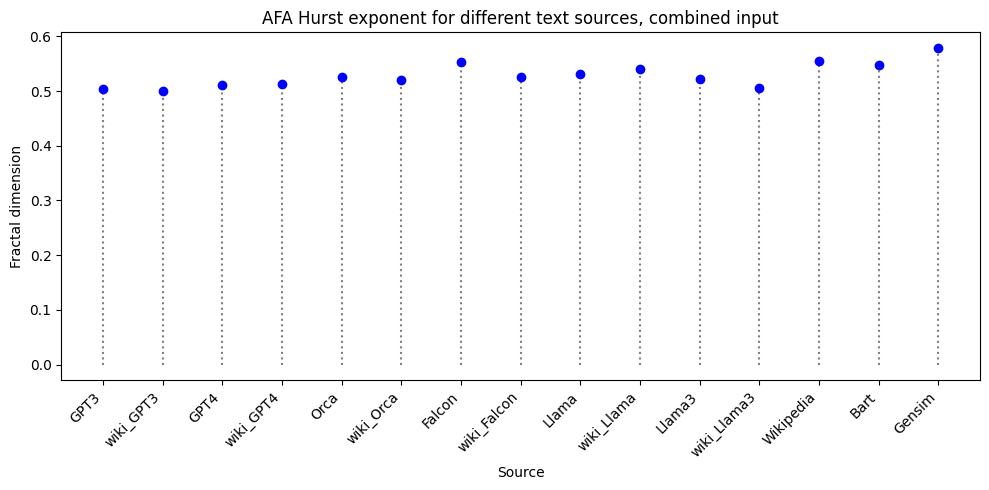

In [208]:
plot_scatter(h_df_afa_combined_lts.values.flatten().tolist(), text_columns, 'AFA Hurst exponent for different text sources, combined input', 'AFA (LTS)')

RRA

In [209]:
from helpers.TimeSeries import construct_its
import os

h_df_filename_rra_combined_pos = 'h_df_rra_combined_pos.csv'

def load_or_create_h_df_filename_rra_combined_pos(pos_df_list):
    if os.path.exists(h_df_filename_rra_combined_pos):
        h_df = pd.read_csv(h_df_filename_rra_combined_pos)
    else:
        h_df = pos_df_list.applymap(rra_calculate_cell_pos)   
        h_df.to_csv(h_df_filename_rra_combined_pos, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [210]:
h_df_rra_combined_pos = load_or_create_h_df_filename_rra_combined_pos(pos_df_list_combined)
h_df_rra_combined_pos.info()
h_df_rra_combined_pos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         1 non-null      float64
 1   wiki_pos_gpt3    1 non-null      float64
 2   pos_gpt4         1 non-null      float64
 3   wiki_pos_gpt4    1 non-null      float64
 4   pos_orca         1 non-null      float64
 5   wiki_pos_orca    1 non-null      float64
 6   pos_falcon       1 non-null      float64
 7   wiki_pos_falcon  1 non-null      float64
 8   pos_llama        1 non-null      float64
 9   wiki_pos_llama   1 non-null      float64
 10  pos_llama3       1 non-null      float64
 11  wiki_pos_llama3  1 non-null      float64
 12  text_pos         1 non-null      float64
 13  bart_pos         1 non-null      float64
 14  gensim_pos       1 non-null      float64
dtypes: float64(15)
memory usage: 248.0 bytes


,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,bart_pos,gensim_pos
0,0.565454,0.554062,0.539664,0.554098,0.563725,0.596347,0.584967,0.570087,0.567827,0.572573,0.569276,0.579824,0.67471,0.585519,0.59577


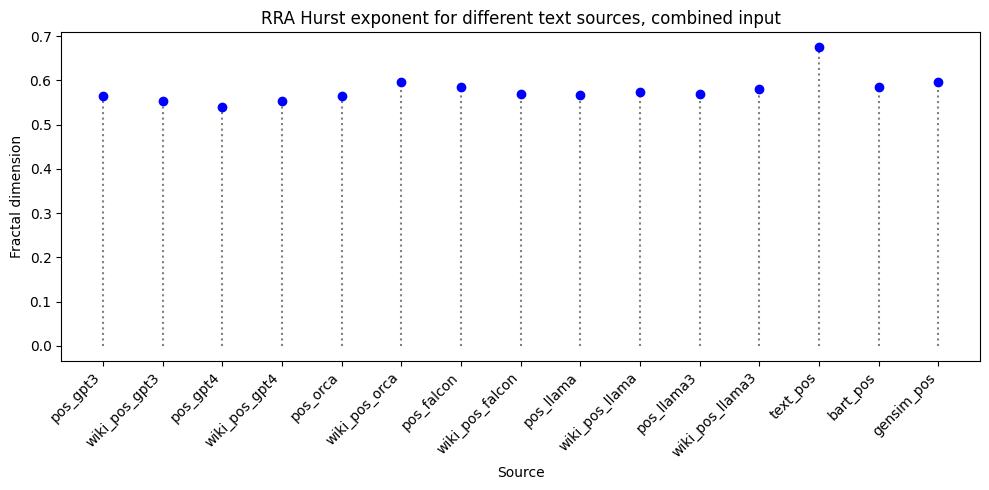

In [211]:
plot_scatter(h_df_rra_combined_pos.values.flatten().tolist(), pos_columns, 'RRA Hurst exponent for different text sources, combined input', 'RRA (POS)')

In [212]:
from helpers.TimeSeries import construct_its
import os

h_df_filename_rra_combined_fts = 'h_df_rra_combined_fts.csv'

def load_or_create_h_df_filename_rra_combined_fts(df_text_combined):
    if os.path.exists(h_df_filename_rra_combined_fts):
        h_df = pd.read_csv(h_df_filename_rra_combined_fts)
    else:
        h_df = df_text_combined.applymap(rra_calculate_cell_fts)   
        h_df.to_csv(h_df_filename_rra_combined_fts, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [213]:
h_df_rra_combined_fts = load_or_create_h_df_filename_rra_combined_fts(df_text_combined)
h_df_rra_combined_fts.info()
h_df_rra_combined_fts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         1 non-null      float64
 1   wiki_GPT3    1 non-null      float64
 2   GPT4         1 non-null      float64
 3   wiki_GPT4    1 non-null      float64
 4   Orca         1 non-null      float64
 5   wiki_Orca    1 non-null      float64
 6   Falcon       1 non-null      float64
 7   wiki_Falcon  1 non-null      float64
 8   Llama        1 non-null      float64
 9   wiki_Llama   1 non-null      float64
 10  Llama3       1 non-null      float64
 11  wiki_Llama3  1 non-null      float64
 12  Wikipedia    1 non-null      float64
 13  Bart         1 non-null      float64
 14  Gensim       1 non-null      float64
dtypes: float64(15)
memory usage: 248.0 bytes


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.545941,0.560511,0.546169,0.557654,0.518977,0.53764,0.522639,0.533046,0.535865,0.544801,0.540197,0.536189,0.587141,0.553596,0.578824


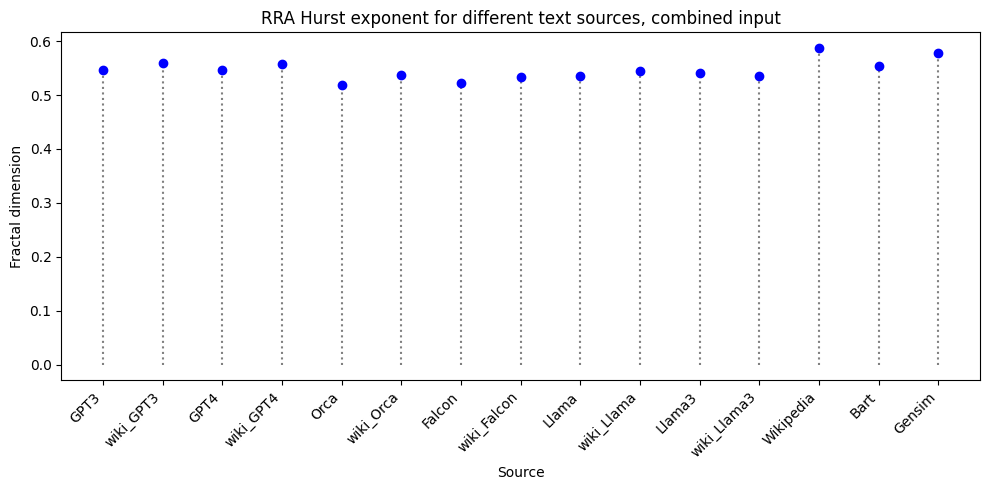

In [214]:
plot_scatter(h_df_rra_combined_fts.values.flatten().tolist(), text_columns, 'RRA Hurst exponent for different text sources, combined input', 'RRA (FTS)')

In [215]:
from helpers.TimeSeries import construct_its
import os

h_df_filename_rra_combined_lts = 'h_df_rra_combined_lts.csv'

def load_or_create_h_df_filename_rra_combined_lts(df_text_combined):
    if os.path.exists(h_df_filename_rra_combined_lts):
        h_df = pd.read_csv(h_df_filename_rra_combined_lts)
    else:
        h_df = df_text_combined.applymap(rra_calculate_cell_lts)   
        h_df.to_csv(h_df_filename_rra_combined_lts, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [216]:
h_df_rra_combined_lts = load_or_create_h_df_filename_rra_combined_lts(df_text_combined)
h_df_rra_combined_lts.info()
h_df_rra_combined_lts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         1 non-null      float64
 1   wiki_GPT3    1 non-null      float64
 2   GPT4         1 non-null      float64
 3   wiki_GPT4    1 non-null      float64
 4   Orca         1 non-null      float64
 5   wiki_Orca    1 non-null      float64
 6   Falcon       1 non-null      float64
 7   wiki_Falcon  1 non-null      float64
 8   Llama        1 non-null      float64
 9   wiki_Llama   1 non-null      float64
 10  Llama3       1 non-null      float64
 11  wiki_Llama3  1 non-null      float64
 12  Wikipedia    1 non-null      float64
 13  Bart         1 non-null      float64
 14  Gensim       1 non-null      float64
dtypes: float64(15)
memory usage: 248.0 bytes


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.608527,0.604545,0.590393,0.589311,0.582453,0.58679,0.585883,0.579458,0.573302,0.587741,0.605761,0.58533,0.630423,0.564471,0.5887


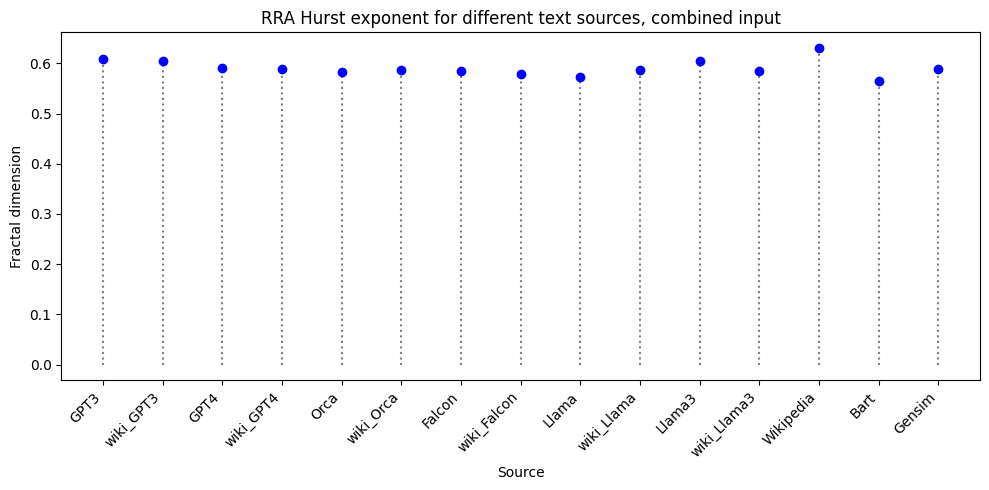

In [217]:
plot_scatter(h_df_rra_combined_lts.values.flatten().tolist(), text_columns, 'RRA Hurst exponent for different text sources, combined input', 'RRA (LTS)')